# Project-3 : Parkinson’s Disease Data Analysis Using Ensembel Techniques
## Module: Ensembel Techniques

Submitted by: Dr. Karthick Lakshmanan

-------------------------------------------------------------------------------------------------------------------------

### Objective: 
#### Goal is to classify the patients into the respective labels using the attributes from their voice recordings


### Domain: Medicine

### Data Description & Context: 

<p style='text-align: justify;'>
Parkinson’s Disease (PD) is a degenerative neurological disorder marked by
decreased dopamine levels in the brain. It manifests itself through a deterioration
of movement, including the presence of tremors and stiffness. There is commonly
a marked effect on speech, including dysarthria (difficulty articulating sounds),
hypophonia (lowered volume), and monotone (reduced pitch range). Additionally,
cognitive impairments and changes in mood can occur, and risk of dementia is
increased.</p>
<p style='text-align: justify;'>
Traditional diagnosis of Parkinson’s Disease involves a clinician taking a
neurological history of the patient and observing motor skills in various situations.
Since there is no definitive laboratory test to diagnose PD, diagnosis is often
difficult, particularly in the early stages when motor effects are not yet severe.
Monitoring progression of the disease over time requires repeated clinic visits by
the patient. An effective screening process, particularly one that doesn’t require a
clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal
features, voice recordings are a useful and non-invasive tool for diagnosis. If
machine learning algorithms could be applied to a voice recording dataset to
accurately diagnosis PD, this would be an effective screening step prior to an
appointment with a clinician
</p>

### Attribute Information:

* name - ASCII subject name and recording number
* MDVP:Fo(Hz) - Average vocal fundamental frequency
* MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
* MDVP:Flo(Hz) - Minimum vocal fundamental frequency
* MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several
* measures of variation in fundamental frequency
* MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,S
* himmer:DDA - Several measures of variation in amplitude
* NHR,HNR - Two measures of ratio of noise to tonal components in the voice
* status - Health status of the subject (one) - Parkinson's, (zero) - healthy
* RPDE,D2 - Two nonlinear dynamical complexity measures
* DFA - Signal fractal scaling exponent
* spread1,spread2,PPE - Three nonlinear measures of fundamental frequency
* variation 9. car name: string (unique for each instance)


### Learning Outcomes:
* Exploratory Data Analysis
* Supervised Learning
* Ensemble Learning

-------------------------------------------------------------------------------------------------------------------------

#### Import necessary Python libraries:

In [192]:
import numpy as np #to import numpy library as np
import pandas as pd #to import pandas library as pd
import matplotlib.pyplot as plt #to import matplotlip libraries pyplot as plt, this is for plotting feature
%matplotlib inline 
import scipy.stats as stats #performing statistics using scipy library. it is imported as stats
import seaborn as sns #data visualization library based on matplotlib, imported as sns
sns.set(color_codes=True) # setting colorcodes as per matplotlib
import warnings
warnings.filterwarnings("ignore") # to ignore the warnings
np.set_printoptions(suppress=True)

# list of modules from sklearn library
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix

#sklearn library for different classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import naive_bayes
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

In [2]:
file = open('Parkinsons_names', 'r') # access and read the description file!
lines = file.readlines()

for line in lines: 
    print(line.strip()) 

Title: Parkinsons Disease Data Set

Abstract: Oxford Parkinson's Disease Detection Dataset

-----------------------------------------------------

Data Set Characteristics: Multivariate
Number of Instances: 197
Area: Life
Attribute Characteristics: Real
Number of Attributes: 23
Date Donated: 2008-06-26
Associated Tasks: Classification
Missing Values? N/A

-----------------------------------------------------

Source:

The dataset was created by Max Little of the University of Oxford, in
collaboration with the National Centre for Voice and Speech, Denver,
Colorado, who recorded the speech signals. The original study published the
feature extraction methods for general voice disorders.

-----------------------------------------------------

Data Set Information:

This dataset is composed of a range of biomedical voice measurements from
31 people, 23 with Parkinson's disease (PD). Each column in the table is a
particular voice measure, and each row corresponds one of 195 voice
recording f

---------------------------------------------------------------------------------------------------------------------------

#### Let's read the data file and store it as a data frame


In [3]:
data = pd.read_table("Parkinsons_data", sep=",") # data file is a comma seperated file!

In [4]:
data.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 24 columns]

### Exploratory Data Analysis

In [5]:
data.shape

(195, 24)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

#### Note:
- 'name' is ASCII subject name and recording number which is of less value for analysis


#### Now let's check if there are any missing values in the data frame columns

In [7]:
data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

Note: since we get 0 for all the individual columns above, each element of the dataframe column has some value, so it is non-empty or NaN

In [8]:
#Number of distinct observations for each column
data.nunique()

name                195
MDVP:Fo(Hz)         195
MDVP:Fhi(Hz)        195
MDVP:Flo(Hz)        195
MDVP:Jitter(%)      173
MDVP:Jitter(Abs)     19
MDVP:RAP            155
MDVP:PPQ            165
Jitter:DDP          180
MDVP:Shimmer        188
MDVP:Shimmer(dB)    149
Shimmer:APQ3        184
Shimmer:APQ5        189
MDVP:APQ            189
Shimmer:DDA         189
NHR                 185
HNR                 195
status                2
RPDE                195
DFA                 195
spread1             195
spread2             194
D2                  195
PPE                 195
dtype: int64

In [9]:
data.describe().T

count        mean        std         min         25%  \
MDVP:Fo(Hz)       195.0  154.228641  41.390065   88.333000  117.572000   
MDVP:Fhi(Hz)      195.0  197.104918  91.491548  102.145000  134.862500   
MDVP:Flo(Hz)      195.0  116.324631  43.521413   65.476000   84.291000   
MDVP:Jitter(%)    195.0    0.006220   0.004848    0.001680    0.003460   
MDVP:Jitter(Abs)  195.0    0.000044   0.000035    0.000007    0.000020   
MDVP:RAP          195.0    0.003306   0.002968    0.000680    0.001660   
MDVP:PPQ          195.0    0.003446   0.002759    0.000920    0.001860   
Jitter:DDP        195.0    0.009920   0.008903    0.002040    0.004985   
MDVP:Shimmer      195.0    0.029709   0.018857    0.009540    0.016505   
MDVP:Shimmer(dB)  195.0    0.282251   0.194877    0.085000    0.148500   
Shimmer:APQ3      195.0    0.015664   0.010153    0.004550    0.008245   
Shimmer:APQ5      195.0    0.017878   0.012024    0.005700    0.009580   
MDVP:APQ          195.0    0.024081   0.016947    0.007190    0.013080   
Shimmer:DDA       195.0    0.046993   0.030459    0.013640    0.024735   
NHR               195.0    0.024847   0.040418    0.000650    0.005925   
HNR               195.0   21.885974   4.425764    8.441000   19.198000   
status            195.0    0.753846   0.431878    0.000000    1.000000   
RPDE              195.0    0.498536   0.103942    0.256570    0.421306   
DFA               195.0    0.718099   0.055336    0.574282    0.674758   
spread1           195.0   -5.684397   1.090208   -7.964984   -6.450096   
spread2           195.0    0.226510   0.083406    0.006274    0.174351   
D2                195.0    2.381826   0.382799    1.423287    2.099125   
PPE               195.0    0.206552   0.090119    0.044539    0.137451   

                         50%         75%         max  
MDVP:Fo(Hz)       148.790000  182.769000  260.105000  
MDVP:Fhi(Hz)      175.829000  224.205500  592.030000  
MDVP:Flo(Hz)      104.315000  140.018500  239.170000  
MDVP:Jitter(%)      0.004940    0.007365    0.033160  
MDVP:Jitter(Abs)    0.000030    0.000060    0.000260  
MDVP:RAP            0.002500    0.003835    0.021440  
MDVP:PPQ            0.002690    0.003955    0.019580  
Jitter:DDP          0.007490    0.011505    0.064330  
MDVP:Shimmer        0.022970    0.037885    0.119080  
MDVP:Shimmer(dB)    0.221000    0.350000    1.302000  
Shimmer:APQ3        0.012790    0.020265    0.056470  
Shimmer:APQ5        0.013470    0.022380    0.079400  
MDVP:APQ            0.018260    0.029400    0.137780  
Shimmer:DDA         0.038360    0.060795    0.169420  
NHR                 0.011660    0.025640    0.314820  
HNR                22.085000   25.075500   33.047000  
status              1.000000    1.000000    1.000000  
RPDE                0.495954    0.587562    0.685151  
DFA                 0.722254    0.761881    0.825288  
spread1            -5.720868   -5.046192   -2.434031  
spread2             0.218885    0.279234    0.450493  
D2                  2.361532    2.636456    3.671155  
PPE                 0.194052    0.252980    0.527367

### Observation:

- For MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz), MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DD, MDVP:Shimmer, MDVP:Shimmer(dB), MDVP:APQ, Shimmer:DDA, NHR, PPE, the mean is slightly higher than median the data looks tailed more toward right.. Q3 and Max difference is significanlty large compared to Q1 and Min difference.

- For Shimmer:APQ3, Shimmer:APQ5, the mean is slightly higher that median and data is sligtly right tailed

- For HNR, mean is lessor than median and data is slightly tailed towards left side.

- For RPDE, DFA, spread1, spread2, D2, the data looks normal having mean and median nearly same.


### Note:
- target variable 'status' is of the type int64, this should be converted into categorical variable for analysis
- there are 23 attributes. The "name" attribute is a "recording number" and is not required for analysis and shall be dropped
- the data columns are of different units and scale, Scaling is needed to maintain the same scale for modeling 

#### data-cleaning need:

1. data scaling is required
2. outliers treament is required
3. few data have multi gausian distribution..
4. target variable 'status' is of type int64.. this need to be converted into categorical variable for analysis

##### Let's check the distribution of the target column: "status"

In [10]:
data["status"].value_counts()

1    147
0     48
Name: status, dtype: int64

Note: health status of the subject:
   -  1 =  Parkinson's
   -  0 =  healthy

   status    percent
1     147  75.384615
0      48  24.615385


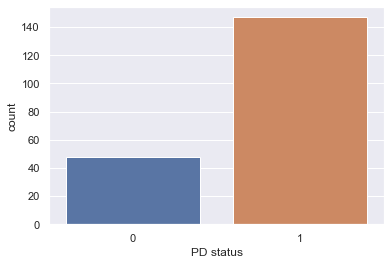

In [11]:
sns.countplot(data['status'])
plt.xlabel('PD status')

datapd = data['status'].value_counts().to_frame()
datapd['percent'] = data['status'].value_counts(normalize=True)*100
print(datapd)

#### Observation: 

 There are 147 people affected with PD with is 75.3% of the data rows!

-----------------------------------------------------------------------------------------------------------------------

#### Let's begin working closely into the data columns--
    


In [12]:
data1 = data.drop(['name'], axis=1)

Note:  Dropping the "name" column, since it is unsignificant and not required for building model

## Univariate & bivariate analysis:

Let's check/vizualize the individual attributes for their basic statistics such as central values, spread, tails, relationships between variables etc.,

#### Plotting vocal fundamental frequency data columns

- MDVP:Fo(Hz) - Average vocal fundamental frequency

- MDVP:Fhi(Hz) - Maximum vocal fundamental frequency

- MDVP:Flo(Hz) - Minimum vocal fundamental frequency

Text(0.5, 0, 'MDVP:Fo(Hz)')

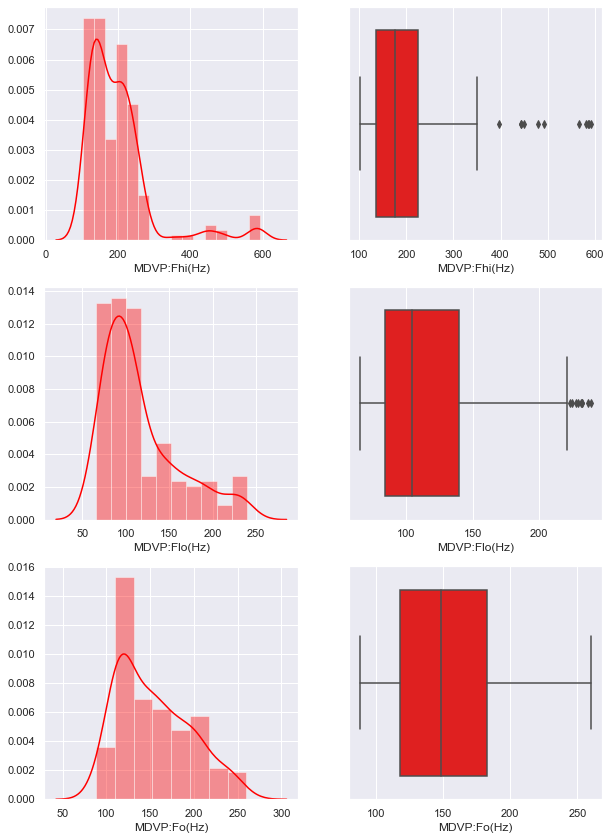

In [13]:
plt.figure(figsize= (10,30))
plt.subplot(6,2,1)
sns.distplot(data1[["MDVP:Fhi(Hz)"]], color='red')
plt.xlabel('MDVP:Fhi(Hz)')

plt.subplot(6,2,2)
sns.boxplot(data1[["MDVP:Fhi(Hz)"]], color='red')
plt.xlabel('MDVP:Fhi(Hz)')

plt.subplot(6,2,3)
sns.distplot(data1[["MDVP:Flo(Hz)"]], color='red')
plt.xlabel('MDVP:Flo(Hz)')

plt.subplot(6,2,4)
sns.boxplot(data1[["MDVP:Flo(Hz)"]], color='red')
plt.xlabel('MDVP:Flo(Hz)')

plt.subplot(6,2,5)
sns.distplot(data1[["MDVP:Fo(Hz)"]], color='red')
plt.xlabel('MDVP:Fo(Hz)')

plt.subplot(6,2,6)
sns.boxplot(data1[["MDVP:Fo(Hz)"]], color='red')
plt.xlabel('MDVP:Fo(Hz)')

 #### Observation:
 the data with vocal fundamental frequency is skewed and the low and hi frequency data is with outliers

#### Plotting several measures of variation in fundamental frequency
- MDVP:Jitter(%)
- MDVP:Jitter(Abs)
- MDVP:RAP
- MDVP:PPQ
- Jitter:DDP

Text(0.5, 0, 'Jitter:DDP')

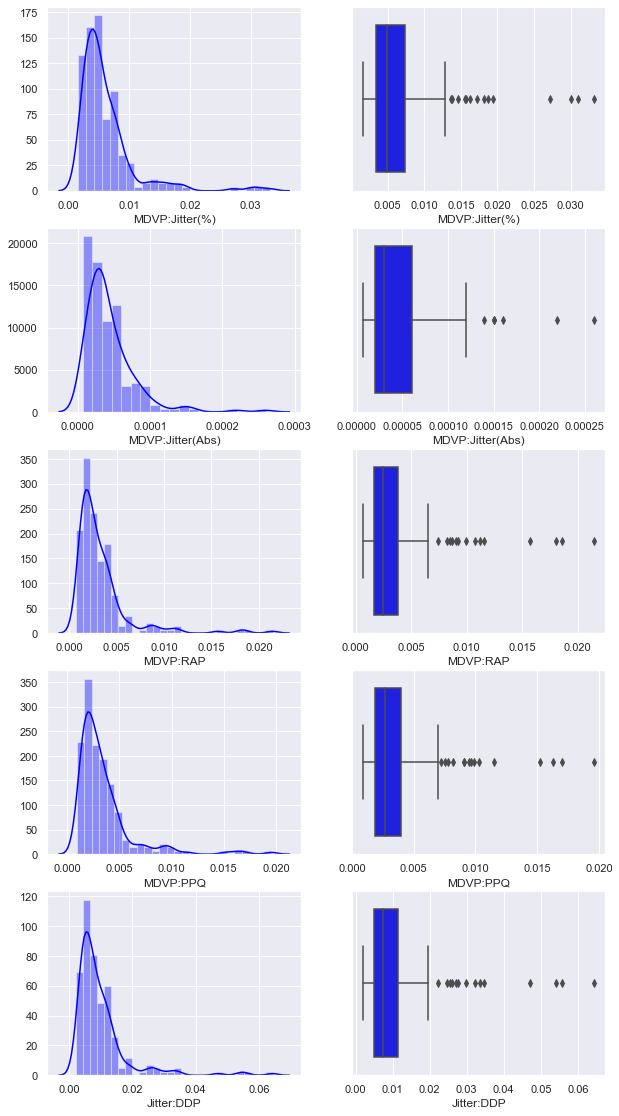

In [14]:
plt.figure(figsize= (10,40))
plt.subplot(10,2,1)
sns.distplot(data1[["MDVP:Jitter(%)"]], color='blue')
plt.xlabel('MDVP:Jitter(%)')

plt.subplot(10,2,2)
sns.boxplot(data1[["MDVP:Jitter(%)"]], color='blue')
plt.xlabel('MDVP:Jitter(%)')

plt.subplot(10,2,3)
sns.distplot(data1[["MDVP:Jitter(Abs)"]], color='blue')
plt.xlabel('MDVP:Jitter(Abs)')

plt.subplot(10,2,4)
sns.boxplot(data1[["MDVP:Jitter(Abs)"]], color='blue')
plt.xlabel('MDVP:Jitter(Abs)')

plt.subplot(10,2,5)
sns.distplot(data1[["MDVP:RAP"]], color='blue')
plt.xlabel('MDVP:RAP')

plt.subplot(10,2,6)
sns.boxplot(data1[["MDVP:RAP"]], color='blue')
plt.xlabel('MDVP:RAP')

plt.subplot(10,2,7)
sns.distplot(data1[["MDVP:PPQ"]], color='blue')
plt.xlabel('MDVP:PPQ')

plt.subplot(10,2,8)
sns.boxplot(data1[["MDVP:PPQ"]], color='blue')
plt.xlabel('MDVP:PPQ')

plt.subplot(10,2,9)
sns.distplot(data1[["Jitter:DDP"]], color='blue')
plt.xlabel('Jitter:DDP')

plt.subplot(10,2,10)
sns.boxplot(data1[["Jitter:DDP"]], color='blue')
plt.xlabel('Jitter:DDP')



#### Observation: 

the data is skewed as well, with outliers

#### Plotting several measures of variation in amplitude
- MDVP:Shimmer
- MDVP:Shimmer(dB)
- Shimmer:APQ3
- Shimmer:APQ5
- MDVP:APQ
- Shimmer:DDA

Text(0.5, 0, 'Shimmer:DDA')

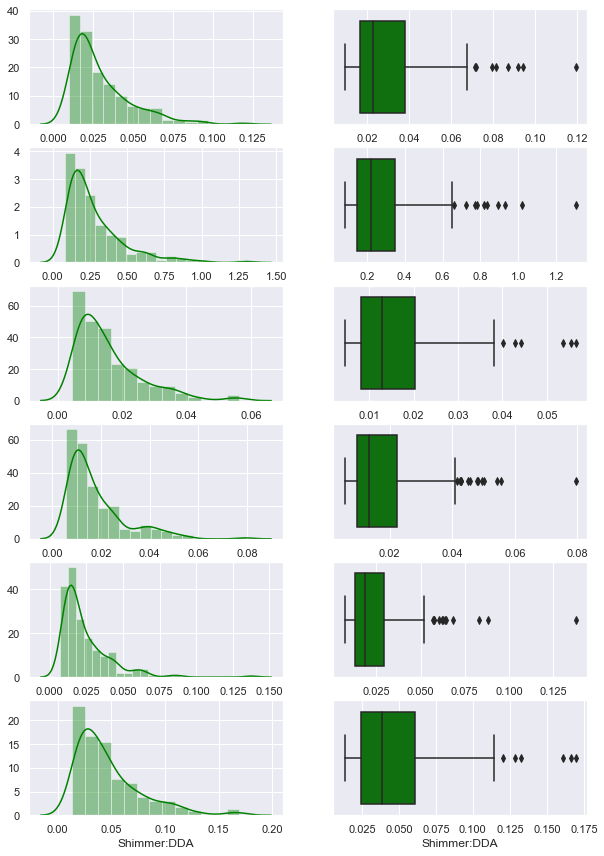

In [15]:
plt.figure(figsize= (10,25))
plt.subplot(10,2,1)
sns.distplot(data1[["MDVP:Shimmer"]], color='green')
plt.xlabel('MDVP:Shimmer')

plt.subplot(10,2,2)
sns.boxplot(data1[["MDVP:Shimmer"]], color='green')
plt.xlabel('MDVP:Shimmer')

plt.subplot(10,2,3)
sns.distplot(data1[["MDVP:Shimmer(dB)"]], color='green')
plt.xlabel('MDVP:Shimmer(dB)')

plt.subplot(10,2,4)
sns.boxplot(data1[["MDVP:Shimmer(dB)"]], color='green')
plt.xlabel('MDVP:Shimmer(dB)')

plt.subplot(10,2,5)
sns.distplot(data1[["Shimmer:APQ3"]], color='green')
plt.xlabel('Shimmer:APQ3')

plt.subplot(10,2,6)
sns.boxplot(data1[["Shimmer:APQ3"]], color='green')
plt.xlabel('Shimmer:APQ3')

plt.subplot(10,2,7)
sns.distplot(data1[["Shimmer:APQ5"]], color='green')
plt.xlabel('Shimmer:APQ5')

plt.subplot(10,2,8)
sns.boxplot(data1[["Shimmer:APQ5"]], color='green')
plt.xlabel('Shimmer:APQ5')

plt.subplot(10,2,9)
sns.distplot(data1[["MDVP:APQ"]], color='green')
plt.xlabel('MDVP:APQ')

plt.subplot(10,2,10)
sns.boxplot(data1[["MDVP:APQ"]], color='green')
plt.xlabel('MDVP:APQ')

plt.subplot(10,2,11)
sns.distplot(data1[["Shimmer:DDA"]], color='green')
plt.xlabel('Shimmer:DDA')

plt.subplot(10,2,12)
sns.boxplot(data1[["Shimmer:DDA"]], color='green')
plt.xlabel('Shimmer:DDA')



#### Plotting:

- NHR,HNR - Two measures of ratio of noise to tonal components in the voice

- status - Health status of the subject (one) - Parkinson's, (zero) - healthy

- RPDE,D2 - Two nonlinear dynamical complexity measures

- DFA - Signal fractal scaling exponent

Text(0.5, 0, 'DFA')

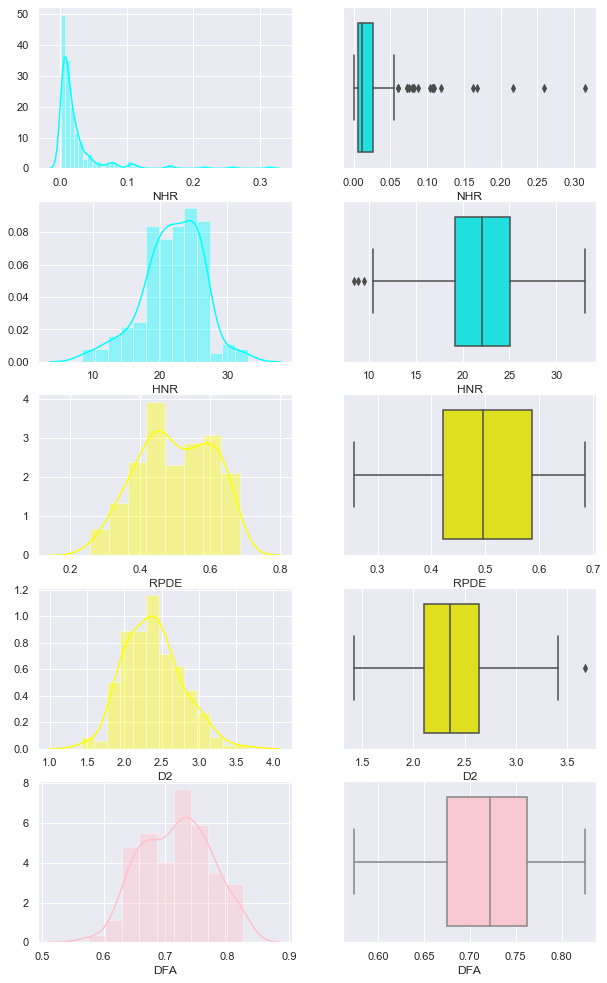

In [16]:
plt.figure(figsize= (10,35))
plt.subplot(10,2,1)
sns.distplot(data1[["NHR"]], color='cyan')
plt.xlabel('NHR')

plt.subplot(10,2,2)
sns.boxplot(data1[["NHR"]], color='cyan')
plt.xlabel('NHR')

plt.subplot(10,2,3)
sns.distplot(data1[["HNR"]], color='cyan')
plt.xlabel('HNR')

plt.subplot(10,2,4)
sns.boxplot(data1[["HNR"]], color='cyan')
plt.xlabel('HNR')

plt.subplot(10,2,5)
sns.distplot(data1[["RPDE"]], color='yellow')
plt.xlabel('RPDE')

plt.subplot(10,2,6)
sns.boxplot(data1[["RPDE"]], color='yellow')
plt.xlabel('RPDE')

plt.subplot(10,2,7)
sns.distplot(data1[["D2"]], color='yellow')
plt.xlabel('D2')

plt.subplot(10,2,8)
sns.boxplot(data1[["D2"]], color='yellow')
plt.xlabel('D2')

plt.subplot(10,2,9)
sns.distplot(data1[["DFA"]], color='pink')
plt.xlabel('DFA')

plt.subplot(10,2,10)
sns.boxplot(data1[["DFA"]], color='pink')
plt.xlabel('DFA')



Plotting three nonlinear measures of fundamental frequency variation
- spread1
- spread2
- PPE

Text(0.5, 0, 'PPE')

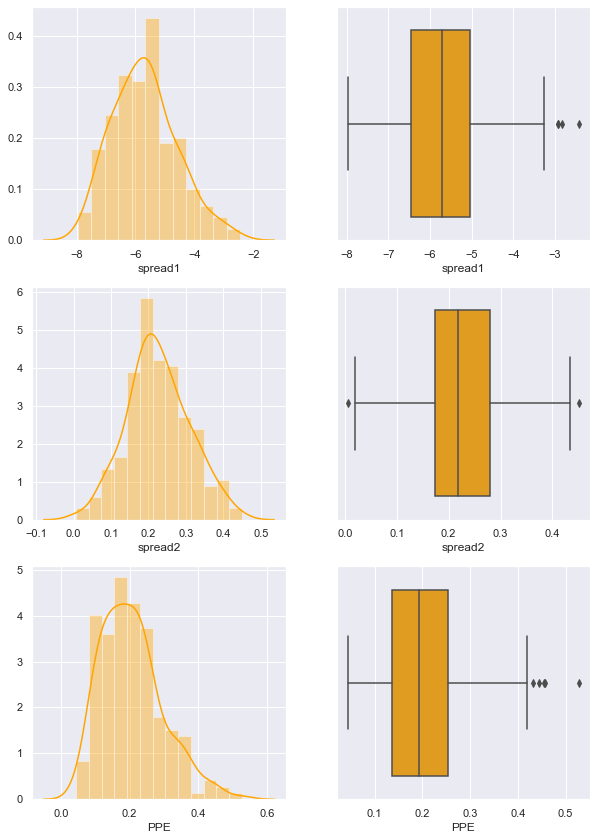

In [17]:
plt.figure(figsize= (10,30))
plt.subplot(6,2,1)
sns.distplot(data1[["spread1"]], color='orange')
plt.xlabel('spread1')

plt.subplot(6,2,2)
sns.boxplot(data1[["spread1"]], color='orange')
plt.xlabel('spread1')

plt.subplot(6,2,3)
sns.distplot(data1[["spread2"]], color='orange')
plt.xlabel('spread2')

plt.subplot(6,2,4)
sns.boxplot(data1[["spread2"]], color='orange')
plt.xlabel('spread2')

plt.subplot(6,2,5)
sns.distplot(data1[["PPE"]], color='orange')
plt.xlabel('PPE')

plt.subplot(6,2,6)
sns.boxplot(data1[["PPE"]], color='orange')
plt.xlabel('PPE')


#### Observation:

The above plots shows the normal distribution for some of the attributes.

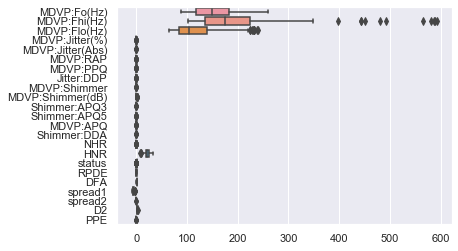

In [18]:
sns.boxplot(data=data1,orient='h')

### Let's do the pair plot to see the relation ship with each variable and influence of status variable!

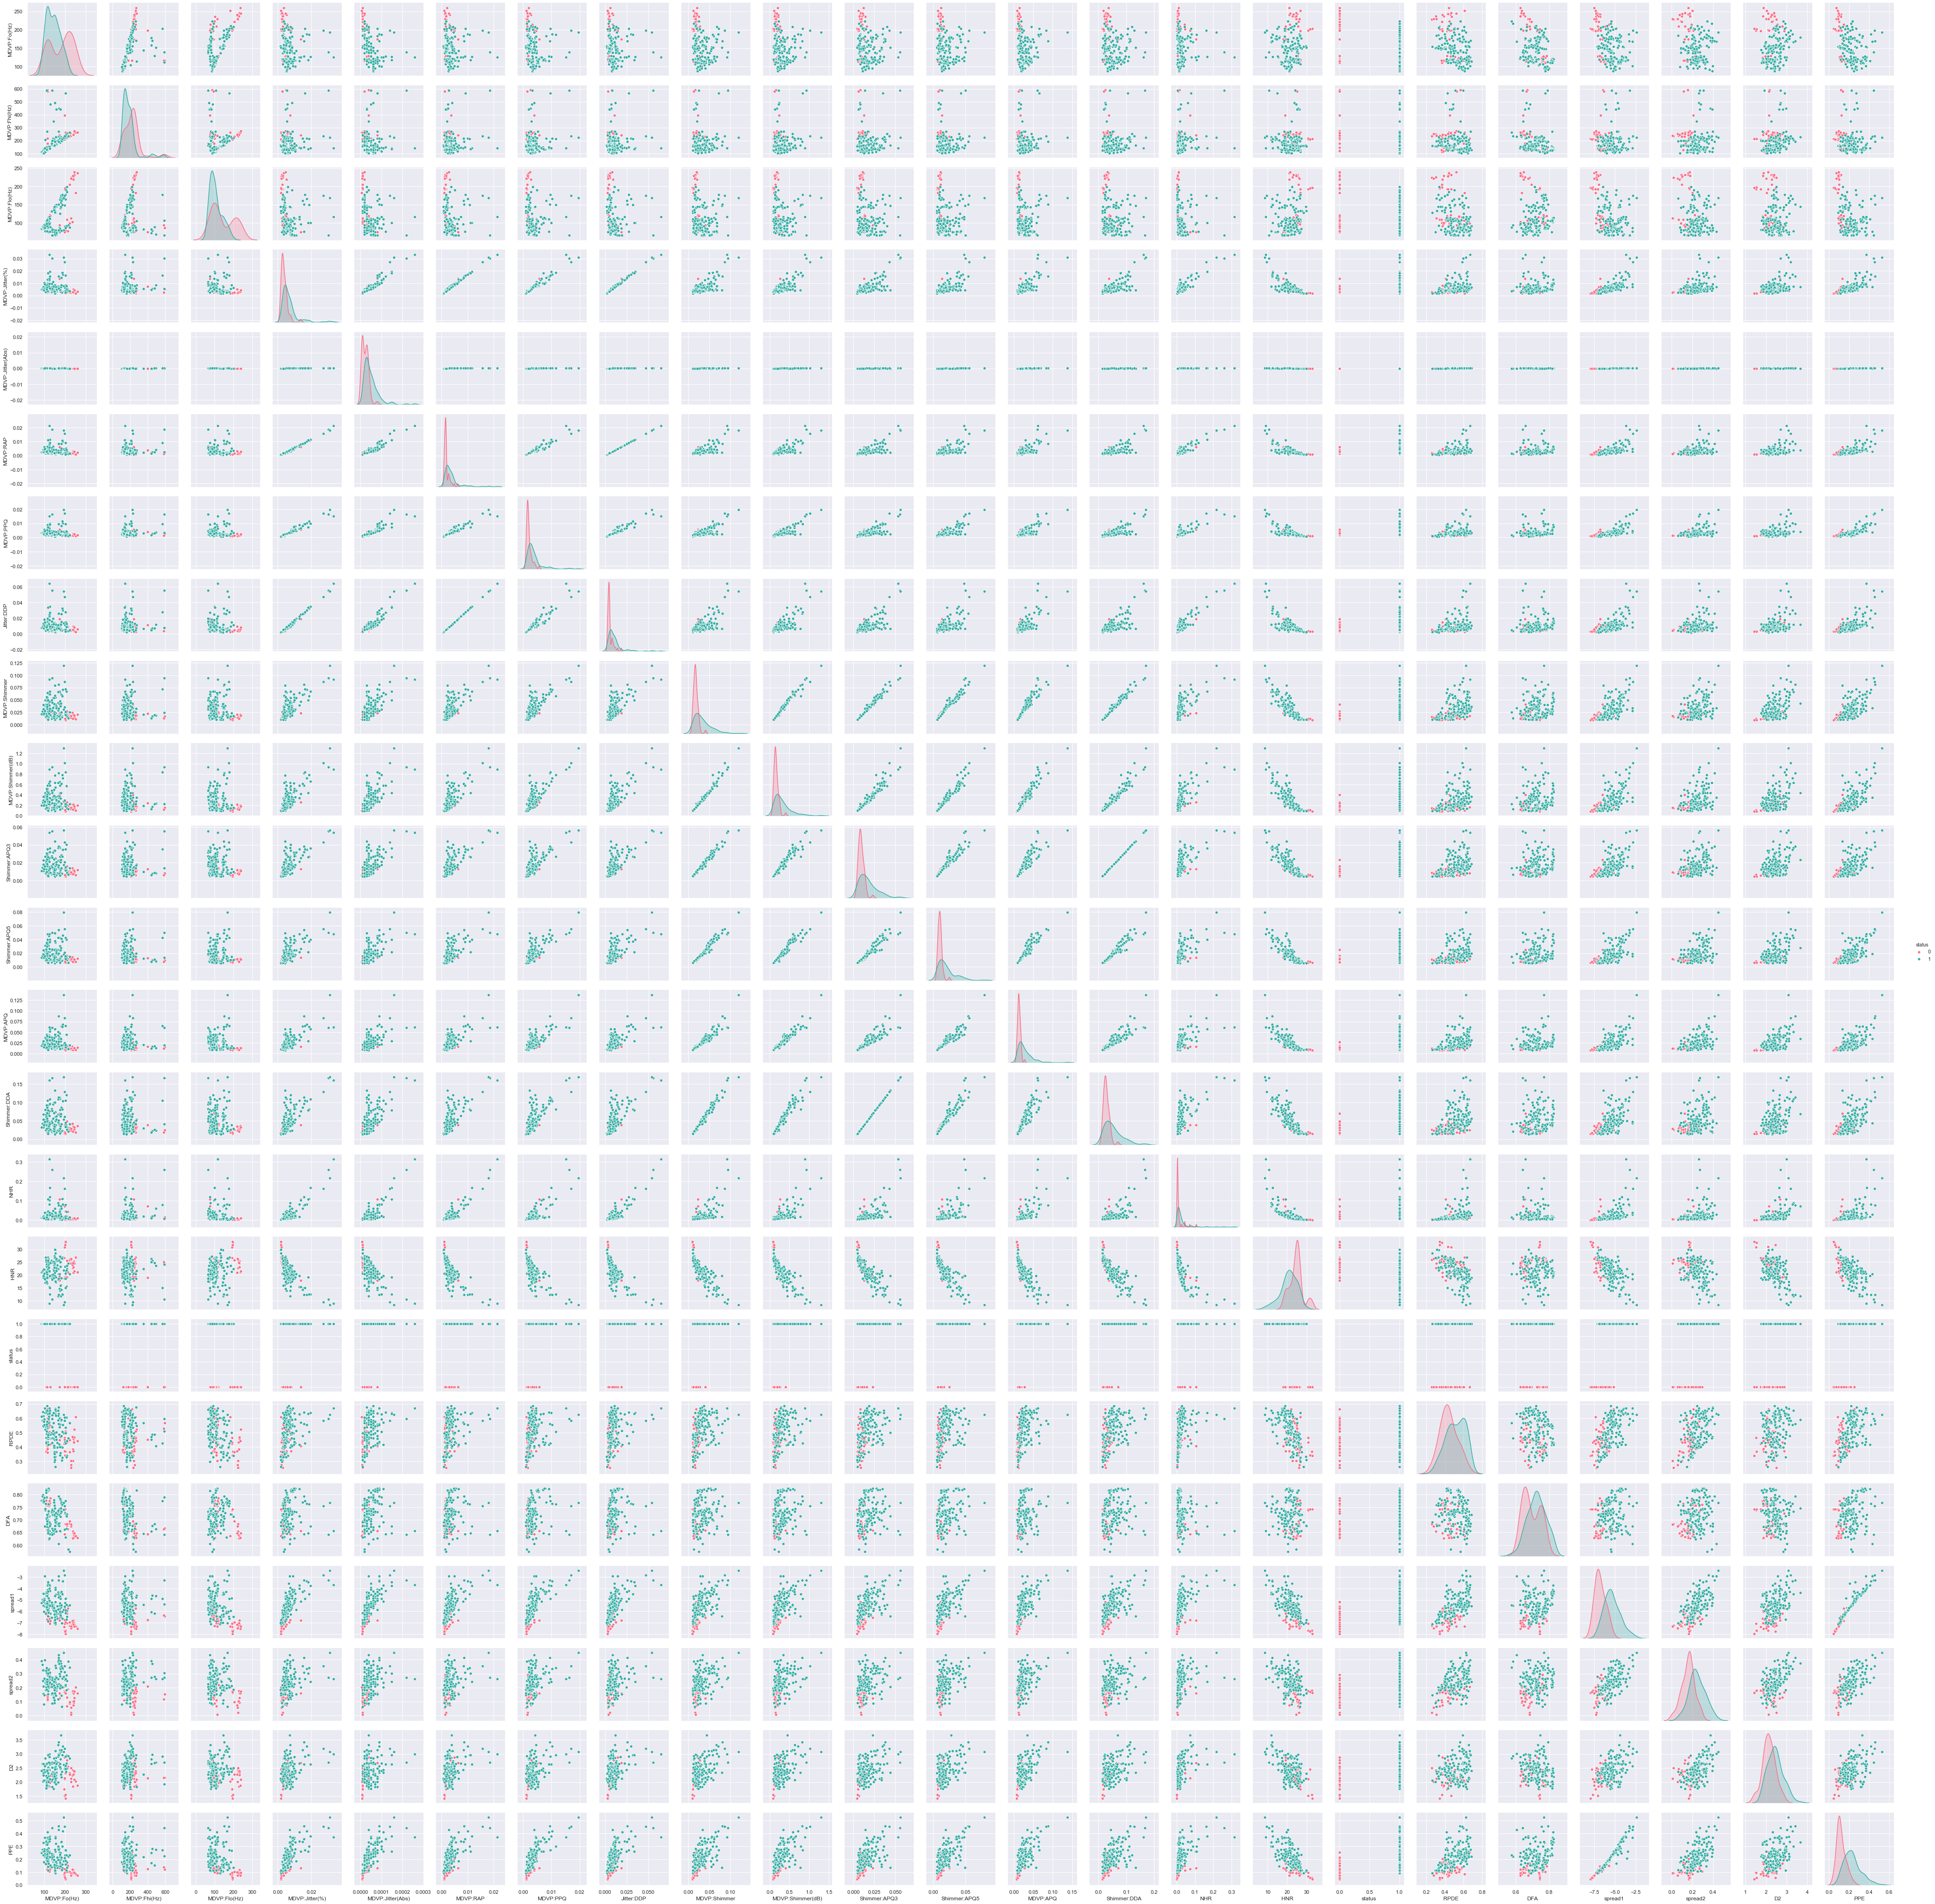

In [19]:
sns.pairplot(data1, hue="status", palette="husl")

Note: since the plot looks complex, let's zoom in to sections!

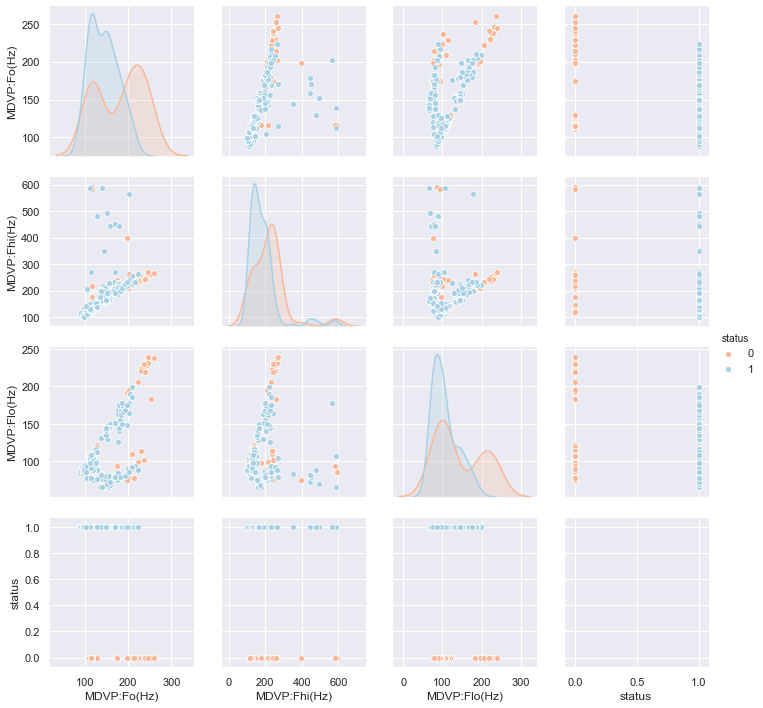

In [20]:
sns.pairplot(data1[['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','status']], palette='RdBu', hue="status")

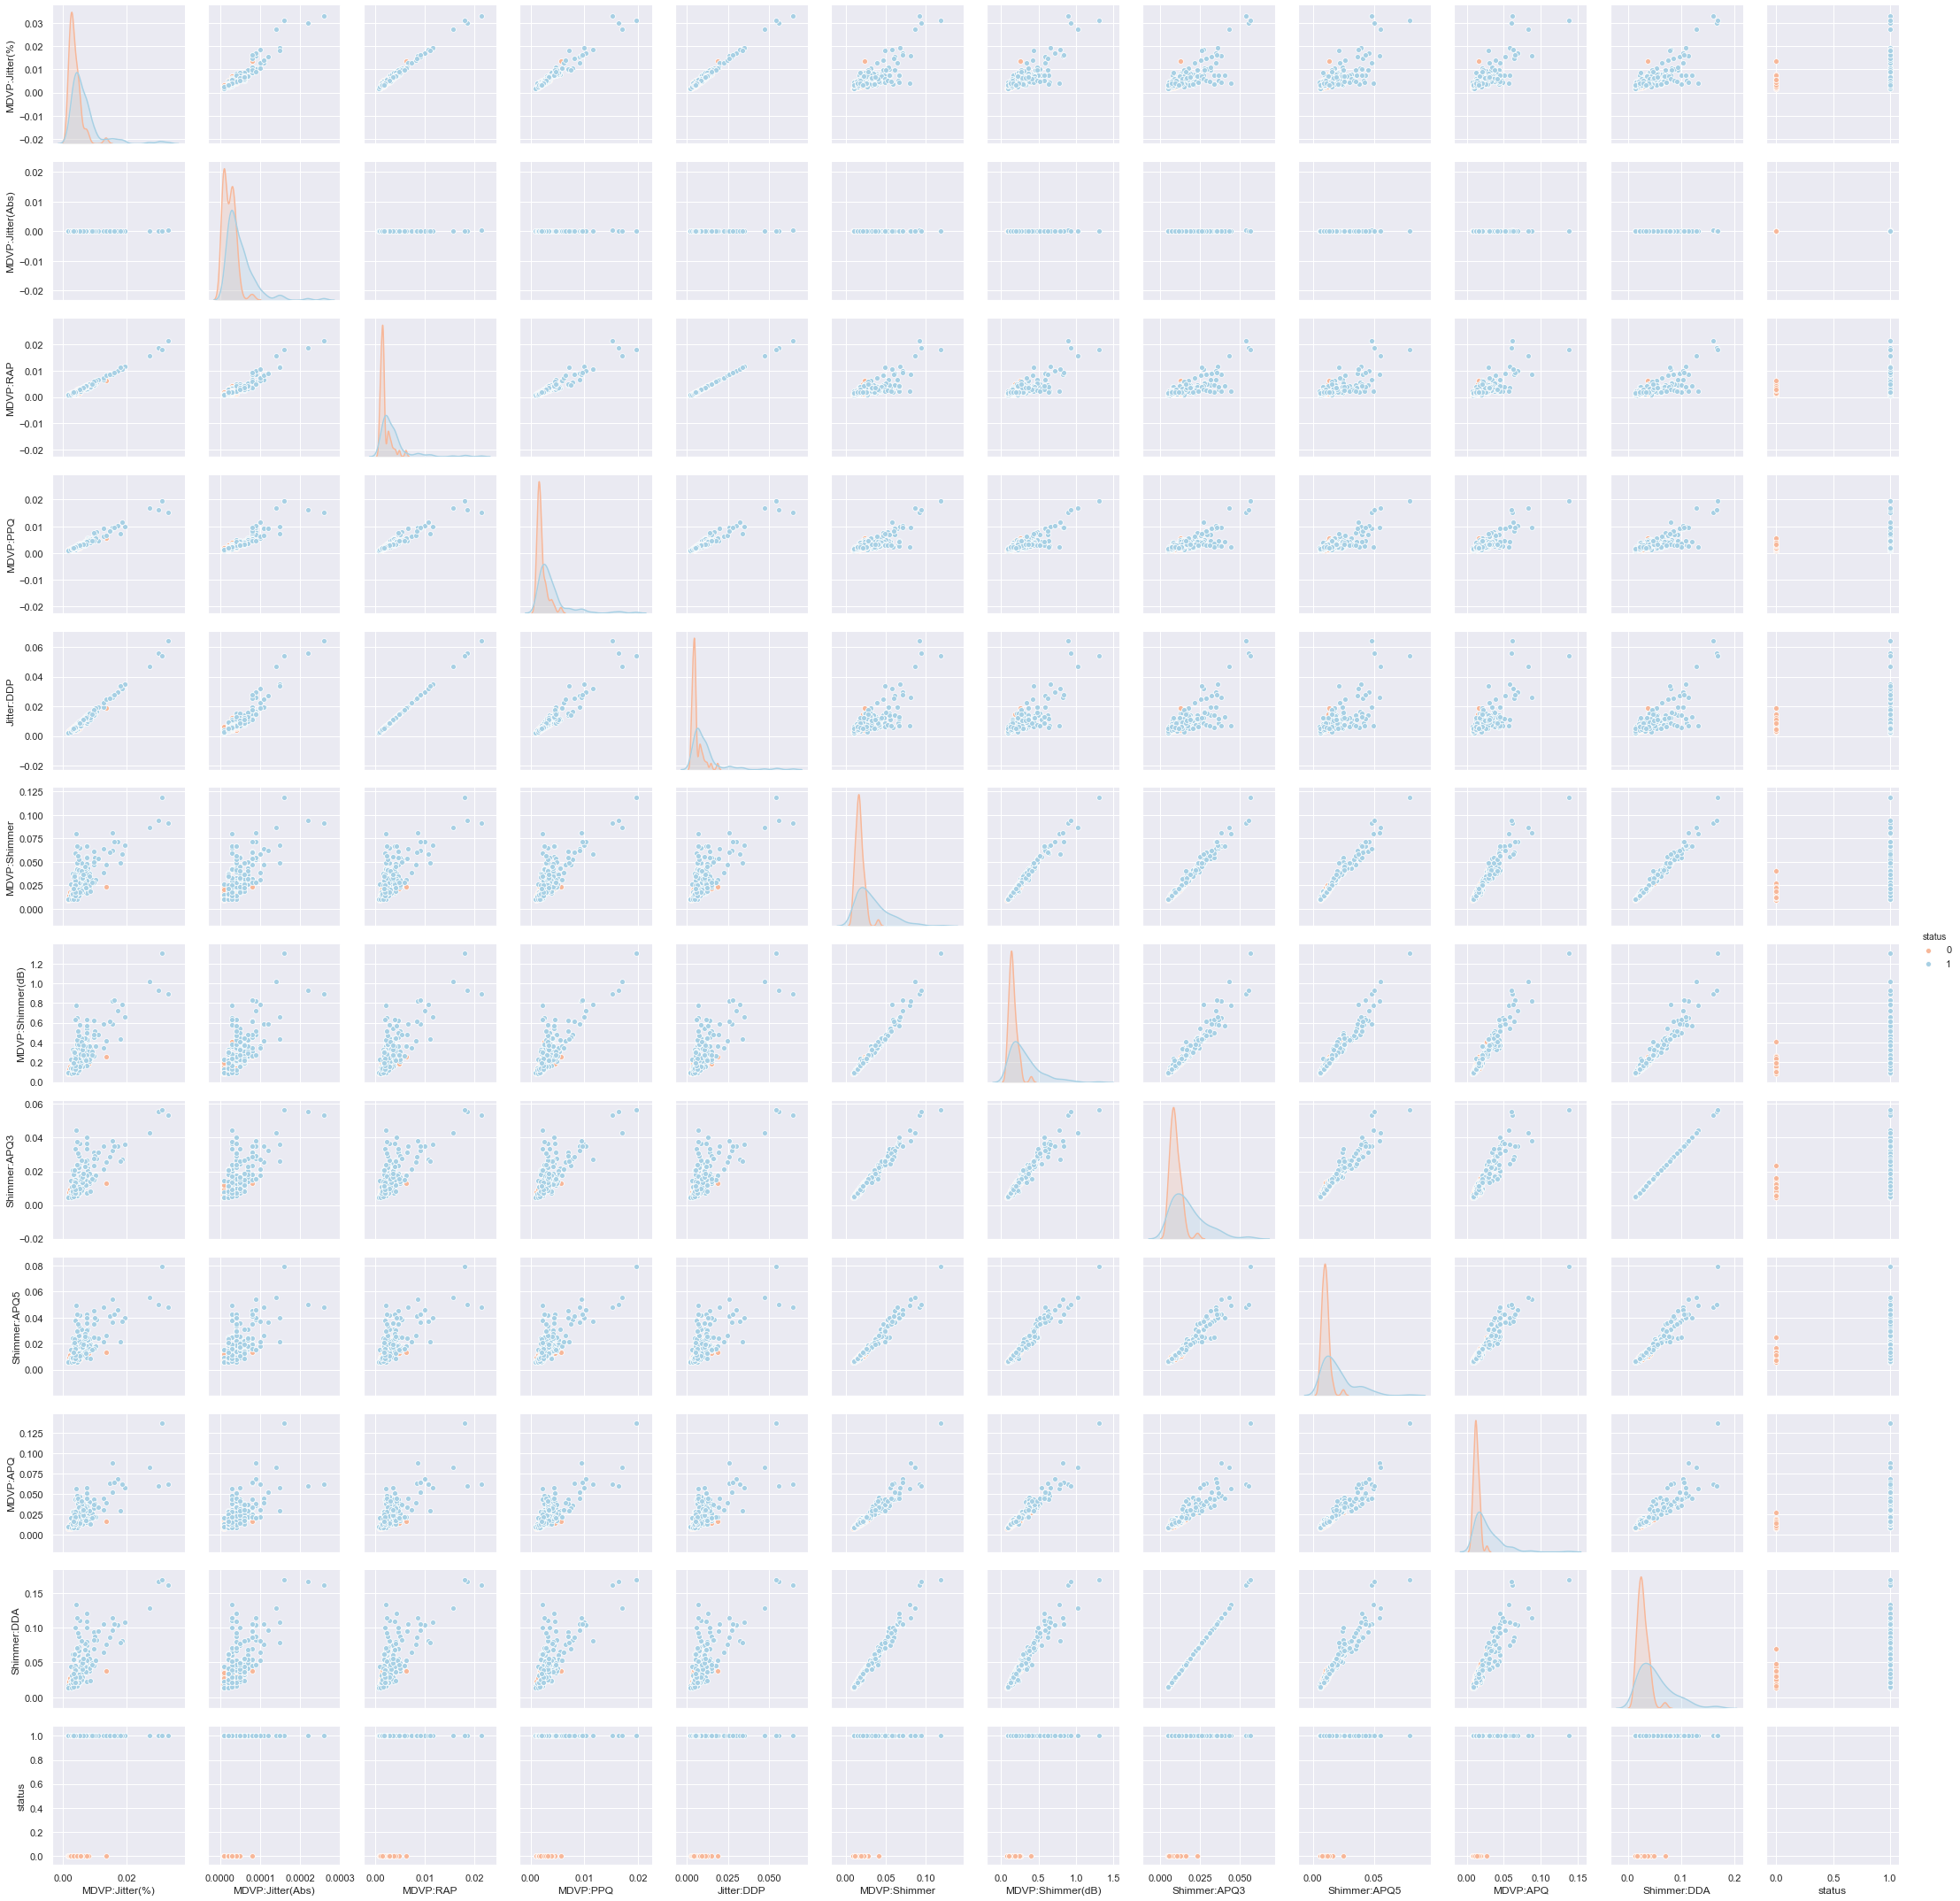

In [21]:
sns.pairplot(data1[['MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)',
 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ','Shimmer:DDA', 'status']], palette='RdBu', hue="status")

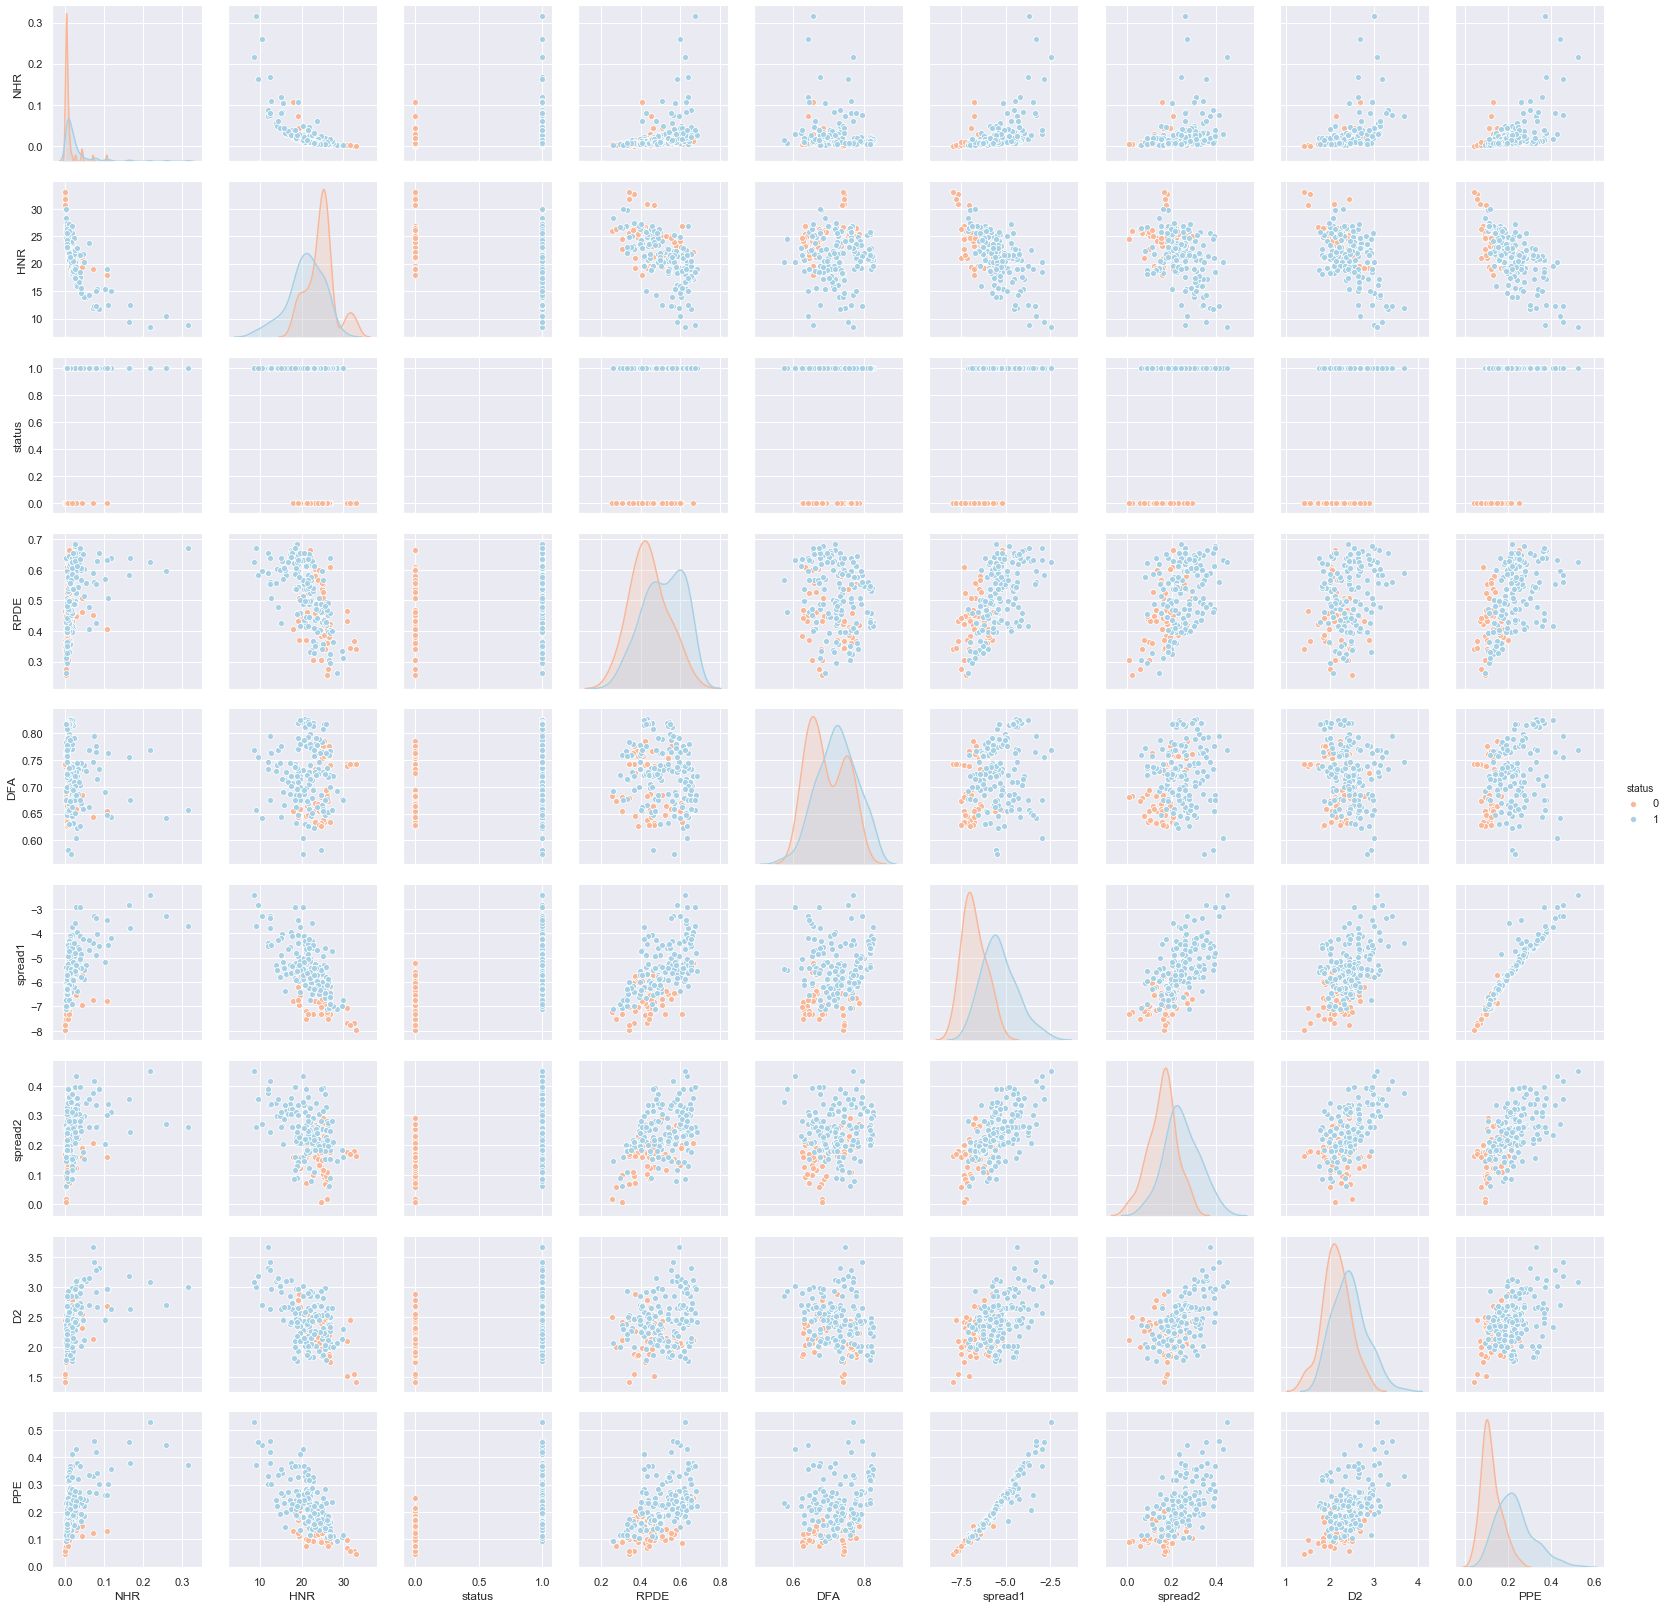

In [22]:
sns.pairplot(data1[[ 'NHR', 'HNR', 'status', 'RPDE','DFA', 'spread1', 'spread2',
                    'D2', 'PPE']], palette='RdBu', hue="status")

(23.0, 0.0)

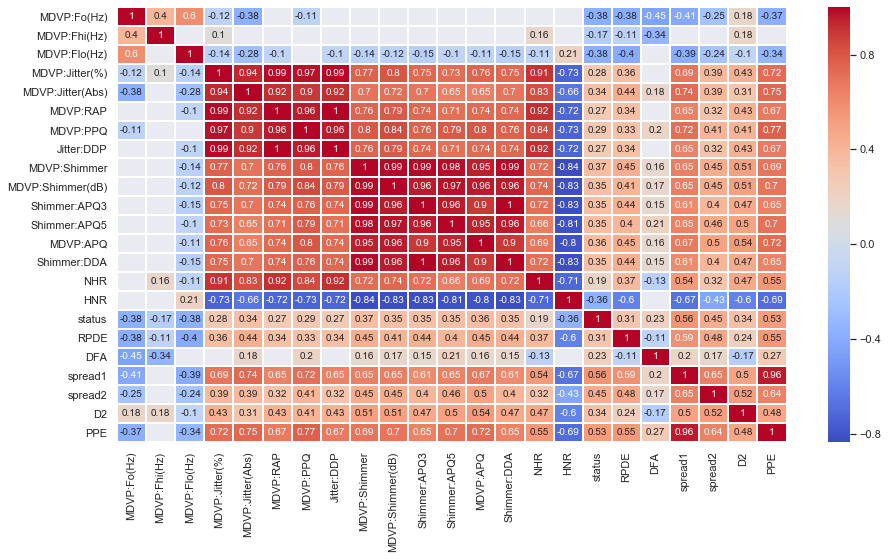

In [23]:
corr = data1.corr()

plt.figure(figsize=(15,8))
ax = sns.heatmap(corr[(corr >= 0.1) | (corr <= -0.1)], annot=True, cmap ='coolwarm',linecolor ='white', linewidths = 1)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Observations 

- MDVP:Jitter(%) has strongly correlated with MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP 
- MDVP:Shimmer(dB) is correlated possitively with MDVP:APQ, Shimmer:APQ3, Shimmer:APQ5, Shimmer:DDA 
- HNR. NHR are highly negatively corelated.
- The distributions are more separable on some dimensions such as spread1, spread2, PPE, D2
- Attributes with multi gausian distributions: MDVP:Fo(Hz), MDVP:Flo(Hz), DFA

#### Quick inference
It is expected that the highly related measures are showing high correlation like, measures of variation in fundamental frequency (MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP)and measures of variation in amplitude(MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA)

#### with relavance to the target variable:

- spread1 variable has a possitive correlation with the status variable, also PPE and Spread2 variables but all are not so strong
- MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz), HNR - negative coorelation with target variable
- Except HNR other variables have formed a moderate / strong correlation with the status field. Hence can influence the outcome of status variable based analysis


## Data Processing

In [98]:
data2 = data1.copy()

Let's remove the outliers from the columns!

In [99]:
def upper_outliers(df, colname):
    data = df[colname]
    irq = np.quantile(a=data,q=0.75)-np.quantile(a=data,q=0.25)
    ub = np.quantile(a=data,q=0.75) + 1.5 * irq
    df[colname] = df[colname].apply(lambda x: ub if x > ub else x)
    
# function to replace lower outlier with their min value of (Q1 - 1.5 * IRQ)
def lower_outliers(df, colname):
    data = df[colname]
    irq = np.quantile(a=data,q=0.75)-np.quantile(a=data,q=0.25)
    lb = np.quantile(a=data,q=0.25) - 1.5 * irq
    df[colname] = df[colname].apply(lambda x: lb if x < lb else x)
    
upper_outliers(data2, "MDVP:Fhi(Hz)") 
upper_outliers(data2, "MDVP:Flo(Hz)") 

upper_outliers(data2, "MDVP:Jitter(%)") 
upper_outliers(data2, "MDVP:Jitter(Abs)") 
upper_outliers(data2, "MDVP:RAP") 
upper_outliers(data2, "MDVP:PPQ") 
upper_outliers(data2, "Jitter:DDP") 
upper_outliers(data2, "MDVP:Shimmer") 
upper_outliers(data2, "MDVP:Shimmer(dB)") 
upper_outliers(data2, "Shimmer:APQ3") 
upper_outliers(data2, "Shimmer:APQ5") 
upper_outliers(data2, "MDVP:APQ") 
upper_outliers(data2, "Shimmer:DDA")
 
upper_outliers(data2, "NHR") 
upper_outliers(data2, "PPE") 

lower_outliers(data2, "HNR")

(-25.774233200000005, 376.02924920000004)

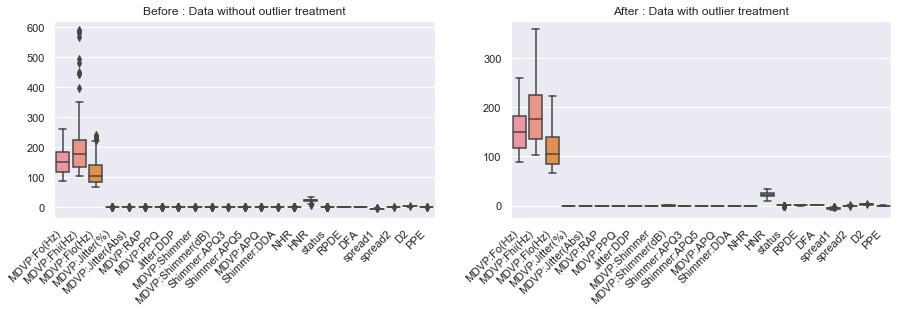

In [100]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
ax = sns.boxplot(data=data1)
plt.xticks(rotation=45, ha='right')
plt.title('Before : Data without outlier treatment')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.subplot(2,2,2)
ax = sns.boxplot(data=data2)
plt.xticks(rotation=45, ha='right')
plt.title('After : Data with outlier treatment')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Now Let's scale the data

(-2.4503753536882265, 3.1781264506228424)

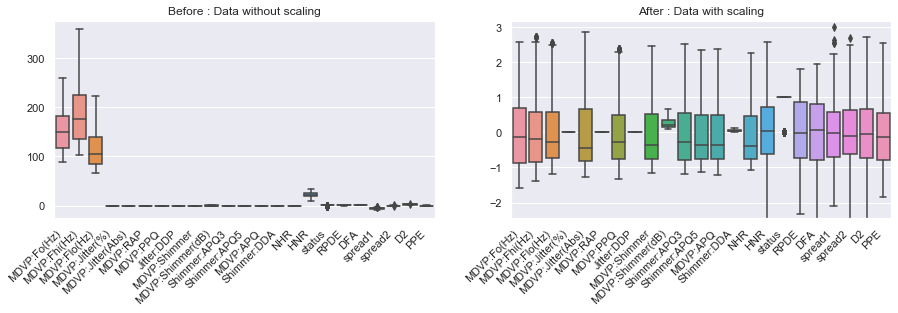

In [103]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()

data3 = data2.copy()

index_name = ['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(Abs)','MDVP:PPQ','MDVP:Shimmer','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','NHR','HNR','RPDE','DFA', 'spread1','spread2','D2','PPE']

data3[index_name] = standardScaler.fit_transform(data3[index_name])

plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
ax = sns.boxplot(data=data2)
plt.xticks(rotation=45, ha='right')
plt.title('Before : Data without scaling')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.subplot(2,2,2)
ax = sns.boxplot(data=data3)
plt.xticks(rotation=45, ha='right')
plt.title('After : Data with scaling')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


## Model creation

#### Let's split the dataset into training and test set in the ratio of 70:30 

In [437]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import matthews_corrcoef

x=data3.drop('status', axis=1)
y=data3.loc[:,'status']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 7)
display(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(136, 22)

(59, 22)

(136,)

(59,)

### Let's train Logistic Regression, Naive Bayes’, SVM, k-NN algorithms and check the accuracies on the test data

#### Applying KNN algorithm 

In [438]:
best_accuracy = []

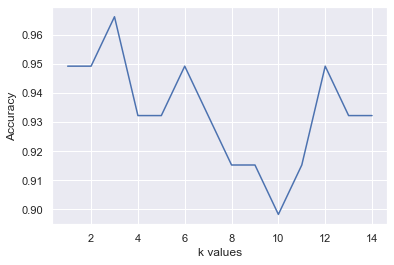

The best accuracy we got is  0.9661016949152542
Best accuracy's k value is  3


In [510]:
#finding the best K for the KNN model
score_list = []
best_score = 0
best_k = 0
for each in range(1,15):
    knn = KNeighborsClassifier(n_neighbors = each)
    knn.fit(x_train,y_train)
    score_list.append(knn.score(x_test,y_test))
    if (knn.score(x_test,y_test) > best_score):
       best_score = knn.score(x_test,y_test)
       best_k = each
    
plt.plot(range(1,15), score_list)
plt.xlabel("k values")
plt.ylabel("Accuracy")
plt.show()

print("The best accuracy we got is ", best_score)
print("Best accuracy's k value is ", best_k)

best_accuracy.append(best_score)

#### Applying Logistic Regression algorithm 

In [440]:
x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
print("test accuracy {}".format(lr.score(x_test.T,y_test.T)))

best_accuracy.append(lr.score(x_test.T,y_test.T))

test accuracy 0.847457627118644


#### Applying SVM algorithm 

In [511]:
#to find the best kernel
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(x_train, y_train)
    svc_scores.append(svc_classifier.score(x_test, y_test))

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

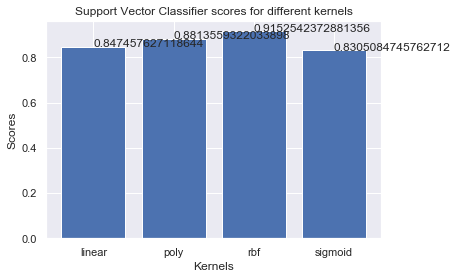

In [445]:
plt.bar(kernels, svc_scores)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

Note: the "rbf" kernel shows maximum scores, so let's this kernel below!

In [443]:
x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

svm = SVC(kernel="rbf", random_state = 42)
svm.fit(x_train,y_train)
print("Accuracy of SVM: ",svm.score(x_test,y_test))

best_accuracy.append(svm.score(x_test,y_test))

Accuracy of SVM:  0.9152542372881356


#### Applying Gaussian Naive Bayse algorithm 

In [394]:
nb = GaussianNB()
nb.fit(x_train,y_train)
print("Accuracy of NB: ", nb.score(x_test,y_test))

best_accuracy.append(nb.score(x_test,y_test))

Accuracy of NB:  0.711864406779661


#### Applying Decision Tree algorithm 

In [513]:
#Finding the optimal max features for the DT classifier
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(x_train, y_train)
    dt_scores.append(dt_classifier.score(x_test, y_test))

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

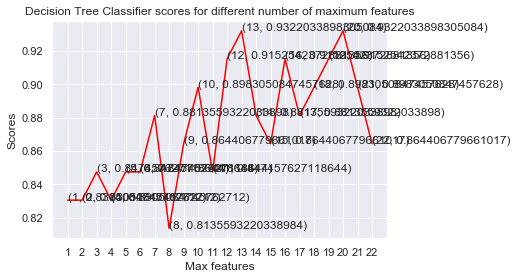

In [448]:
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'red')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

Note: as seen in the above plot, a max feature of 20 is applyed for the model building

In [452]:
dt = DecisionTreeClassifier(max_features =20)
dt.fit(x_train,y_train)
print("Accuracy of Decision Tree: ", dt.score(x_test,y_test))

best_accuracy.append(dt.score(x_test,y_test))

Accuracy of Decision Tree:  0.864406779661017


### Let's plot the accuracy results of all the models

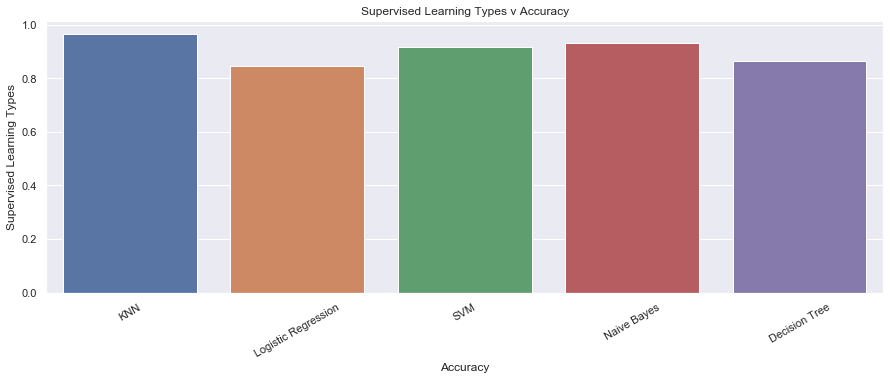

In [455]:
sv_ml = [ "KNN", "Logistic Regression","SVM","Naive Bayes", "Decision Tree"]

plt.figure(figsize=(15,5))
sns.barplot(x = sv_ml, y = best_accuracy)
plt.xticks(rotation= 30)
plt.xlabel('Accuracy')
plt.ylabel('Supervised Learning Types')
plt.title('Supervised Learning Types v Accuracy')
plt.show()

#### Lets re-test the accuracies with the application of cross validation method with CV=10 folds

In [461]:
results1 = []

In [462]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import matthews_corrcoef

num_folds = 10
num_instances = len(x_train)
seed = 8

scoring = 'accuracy'

models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=3)))
models.append(('DT', DecisionTreeClassifier(max_features =20)))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(kernel="rbf")))

results = []
names = []
print("Scores for each algorithm:")
for name, model in models:
    kfold = KFold(num_instances, random_state = seed)
    cv_results = cross_val_score(model, x_train, y_train, cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    print(name, accuracy_score(y_test, predictions)*100)
    results1.append(accuracy_score(y_test, predictions))
    print(matthews_corrcoef(y_test, predictions))
    print()

Scores for each algorithm:
LR 84.7457627118644
0.5149319112271894

KNN 96.61016949152543
0.894046826453266

DT 84.7457627118644
0.6082731503531377

NB 71.1864406779661
0.3731517305324783

SVC 91.52542372881356
0.7261154107602935



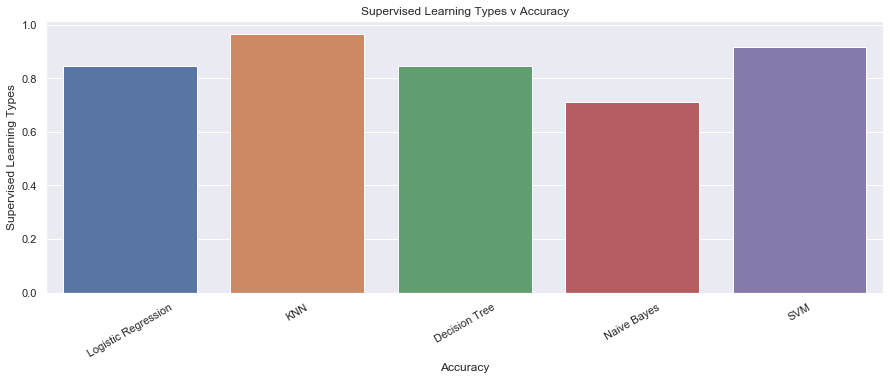

In [463]:
sv_ml2 = ["Logistic Regression", "KNN", "Decision Tree", "Naive Bayes","SVM"]

plt.figure(figsize=(15,5))
sns.barplot(x = sv_ml2, y = results1)
plt.xticks(rotation= 30)
plt.xlabel('Accuracy')
plt.ylabel('Supervised Learning Types')
plt.title('Supervised Learning Types v Accuracy')
plt.show()

### Result:

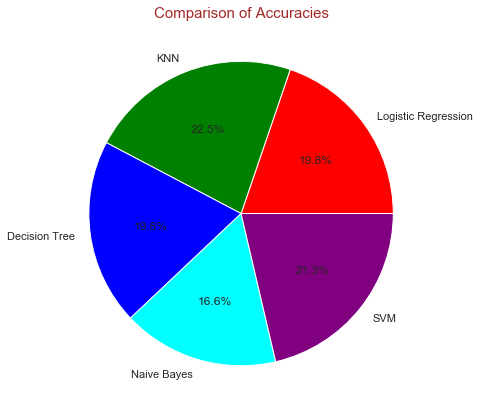

In [464]:
colors = ['red','green','blue','cyan','purple']
labels = sv_ml2
explode = [0,0,0,0,0]
sizes = results1

# visual
plt.figure(figsize = (7,7))
plt.pie(sizes, labels=labels, explode=explode, colors=colors, autopct='%1.1f%%')
plt.title('Comparison of Accuracies',color = 'brown',fontsize = 15)
plt.show()

### Observation:

- the models performed good with accuracy on the rescaled dataset with a 70/30 train-test split.
- The two highest performing algorithms, k Nearest Neighbors and the SVM, with accuracies 96.6% and 91.5%. 

--------------------------------------------------------------------------------------------------------------------

Extra: Voting based Ensemble learning

In [534]:
models #array of models created before

[('LR',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='warn', n_jobs=None, penalty='l2',
                     random_state=None, solver='warn', tol=0.0001, verbose=0,
                     warm_start=False)),
 ('KNN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                       metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                       weights='uniform')),
 ('DT',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                         max_features=20, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort=False,
                         random_state=None, splitter='best')),
 ('NB', GaussianNB(priors=

In [542]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(models)
results = model_selection.cross_val_score(ensemble, x, y, cv=kfold)
print('Acuracy based on combined models : %.2f' %(results.mean()))

Acuracy based on combined models : 0.87


-------------------------------------------------------------------------------------------------------------------------

### Now let's train a meta-classifier and check the accuracy

In [551]:
from mlxtend.classifier import StackingClassifier
from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
from sklearn.model_selection import cross_val_score, train_test_split
import itertools
from sklearn.decomposition import PCA

clf1 = GaussianNB()
clf2 = SVC()
clf3 = DecisionTreeClassifier()
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], 
                          meta_classifier=lr)

Accuracy: 0.69 (+/- 0.08) [NB]
Accuracy: 0.86 (+/- 0.02) [SVC]
Accuracy: 0.85 (+/- 0.08) [DT]
Accuracy: 0.88 (+/- 0.02) [Stacking Classifier]


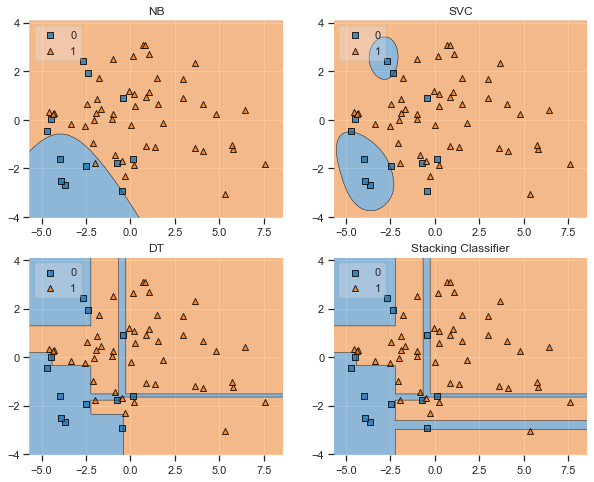

In [553]:
label = ['NB', 'SVC', 'DT', 'Stacking Classifier']
clf_list = [clf1, clf2, clf3, sclf]

fig = plt.figure(figsize=(10,8))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0,1],repeat=2)

clf_cv_mean = []
clf_cv_std = []
for clf, label, grd in zip(clf_list, label, grid):
        
    scores = cross_val_score(clf, x_test, y_test, cv=3, scoring='accuracy')
    print ("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
    clf_cv_mean.append(scores.mean())
    clf_cv_std.append(scores.std())
    pca = PCA(n_components = 2)
    X_train2 = pca.fit_transform(x_test)

    clf.fit(X_train2, y_test)

    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(np.array(X_train2), np.array(y_test), clf=clf, legend=2)
    plt.title(label)

plt.show()


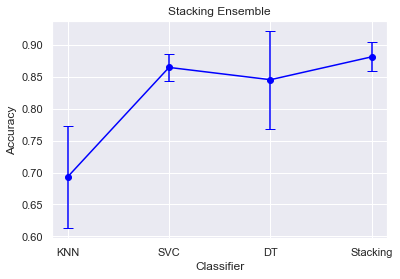

In [554]:
plt.figure()
(_, caps, _) = plt.errorbar(range(4), clf_cv_mean, yerr=clf_cv_std, c='blue', fmt='-o', capsize=5)
for cap in caps:
    cap.set_markeredgewidth(1)                                                                                                                                
plt.xticks(range(4), ['KNN', 'SVC', 'DT','Stacking'])        
plt.ylabel('Accuracy'); plt.xlabel('Classifier'); plt.title('Stacking Ensemble');
plt.show()

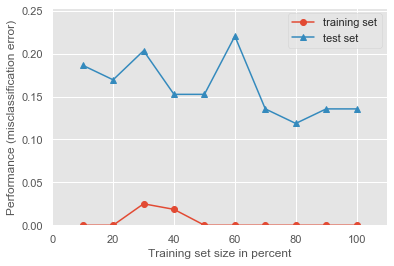

In [594]:
plt.figure()
plot_learning_curves(x_train, y_train, x_test, y_test, sclf, print_model=False, style='ggplot')
plt.show()

### Observation:

- Among the choosen models stacking classifier performed best with 0.88 accuracy
- choice of the models influence the stacking ensemble


#### Inference:

The stacking ensemble consists of Naive bayes, Random Forest, and DT as base classifiers whose predictions are combined by Logistic Regression as a meta-classifier. We can see the blending of decision boundaries achieved by the stacking classifier. The figure also shows that stacking achieves higher accuracy than individual classifiers.

## Ensemble Techniques:

#### Let's quickly construct and visualize a decision tree!

In [478]:
# Applying decision tree model
dt_model = DecisionTreeClassifier(max_features =20,criterion='entropy',max_depth=6,random_state=100,min_samples_leaf=5)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
                       max_features=20, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [479]:
dt_model.score(x_test , y_test) 

0.8813559322033898

0.8813559322033898


(2.0, 0.0)

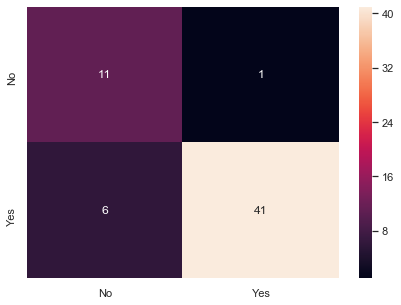

In [548]:
y_predict = dt_model.predict(x_test)

print(bgcl.score(x_test , y_test))

cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
ax=sns.heatmap(df_cm, annot=True ,fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [481]:
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))

Misclassified samples: 7


In [482]:
from IPython.display import Image
from sklearn import tree
from os import system

train_char_label = ['No', 'Yes']
pd_tree_regularized = open('pd_tree_regularized.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file= pd_tree_regularized , feature_names = list(x_train), class_names = list(train_char_label))

pd_tree_regularized.close()

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = x_train.columns))

                       Imp
MDVP:Fo(Hz)       0.159305
MDVP:Fhi(Hz)      0.000000
MDVP:Flo(Hz)      0.000000
MDVP:Jitter(%)    0.000000
MDVP:Jitter(Abs)  0.000000
MDVP:RAP          0.000000
MDVP:PPQ          0.000000
Jitter:DDP        0.000000
MDVP:Shimmer      0.000000
MDVP:Shimmer(dB)  0.065038
Shimmer:APQ3      0.000000
Shimmer:APQ5      0.000000
MDVP:APQ          0.141926
Shimmer:DDA       0.000000
NHR               0.000000
HNR               0.000000
RPDE              0.027650
DFA               0.176873
spread1           0.000000
spread2           0.000000
D2                0.000000
PPE               0.429208


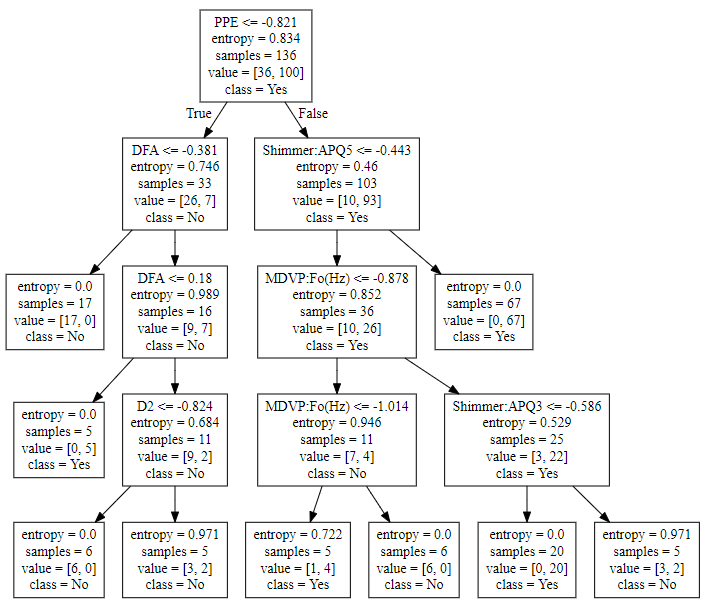

In [483]:
Image("pd_tree_regularized.png")

### Applying the Random forest model to check the accuracy of the Model

In [484]:
from sklearn.ensemble import RandomForestClassifier

In [499]:
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(x_train, y_train)
y_pred = rfcl.predict(x_test)
rfcl.score(x_test , y_test)

0.9152542372881356

0.8813559322033898


(2.0, 0.0)

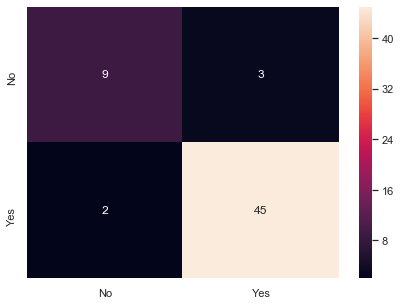

In [547]:
y_predict = rfcl.predict(x_test)

print(bgcl.score(x_test , y_test))

cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
ax=sns.heatmap(df_cm, annot=True ,fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [500]:
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples in Random Forest: {}'.format(count_misclassified))

Misclassified samples in Random Forest: 5


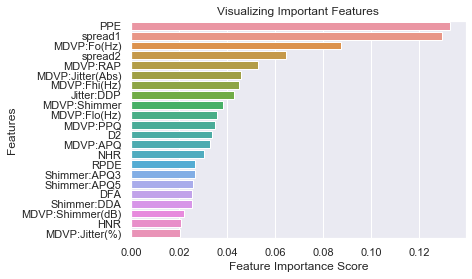

In [557]:
feature_imp = pd.Series(rfcl.feature_importances_,index=x.columns).sort_values(ascending=False)
feature_imp
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Applying the Bagging Classifier Algorithm

In [376]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(base_estimator=dt_model, n_estimators=50, max_samples=.7)
bgcl = bgcl.fit(x_train, y_train)
y_pred = bgcl.predict(x_test)
bgcl.score(x_test , y_test)

0.8813559322033898

0.8813559322033898


(2.0, 0.0)

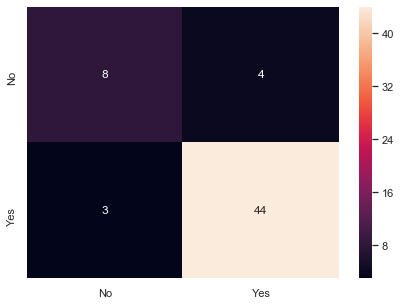

In [544]:
y_predict = bgcl.predict(x_test)

print(bgcl.score(x_test , y_test))

cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
ax=sns.heatmap(df_cm, annot=True ,fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [377]:
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples in Bagging: {}'.format(count_misclassified))

Misclassified samples in Bagging: 7


Bagging with two base estimators

In [558]:
clf1 = SVC()
clf2 = KNeighborsClassifier(n_neighbors=3)    

bagging1 = BaggingClassifier(base_estimator=clf1, n_estimators=10, max_samples=0.8, max_features=0.8)
bagging2 = BaggingClassifier(base_estimator=clf2, n_estimators=10, max_samples=0.8, max_features=0.8)

Accuracy: 0.85 (+/- 0.07) [SVC]
Accuracy: 0.82 (+/- 0.06) [K-NN]
Accuracy: 0.87 (+/- 0.08) [Bagging SVC]
Accuracy: 0.85 (+/- 0.08) [Bagging K-NN]


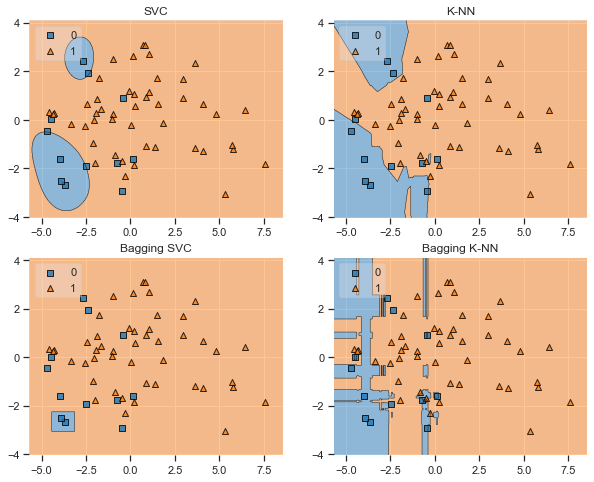

In [561]:
label = ['SVC', 'K-NN', 'Bagging SVC', 'Bagging K-NN']
clf_list = [clf1, clf2, bagging1, bagging2]

fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0,1],repeat=2)

for clf, label, grd in zip(clf_list, label, grid):        
    scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print ("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
    pca = PCA(n_components = 2)
    X_train2 = pca.fit_transform(x_test)

    clf.fit(X_train2, y_test)

    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(np.array(X_train2), np.array(y_test), clf=clf, legend=2)
    plt.title(label)

plt.show()

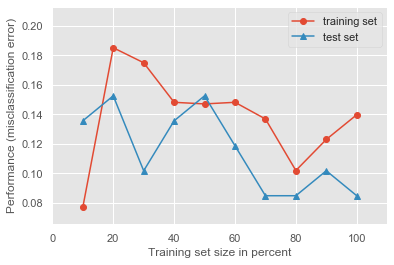

In [592]:
plot_learning_curves(x_train, y_train, x_test, y_test, bagging1, print_model=False, style='ggplot')
plt.show()

### Boosting Classifier

### Applying the Adaboost and GradientBoost Ensemble Algorithms

In [378]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier( n_estimators= 50)
abcl = abcl.fit(x_train,y_train)
y_pred = abcl.predict(x_test)
abcl.score(x_test , y_test)

0.9322033898305084

0.8813559322033898


(2.0, 0.0)

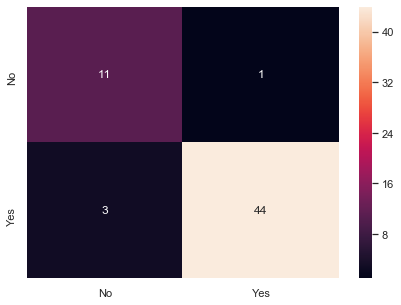

In [545]:
y_predict = abcl.predict(x_test)

print(bgcl.score(x_test , y_test))

cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
ax=sns.heatmap(df_cm, annot=True ,fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [379]:
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples in Ada Boosting: {}'.format(count_misclassified))

Misclassified samples in Ada Boosting: 4


In [582]:
num_est = [1, 2, 3, 10]
label = ['AdaBoost (n_est=1)', 'AdaBoost (n_est=2)', 'AdaBoost (n_est=3)', 'AdaBoost (n_est=10)']

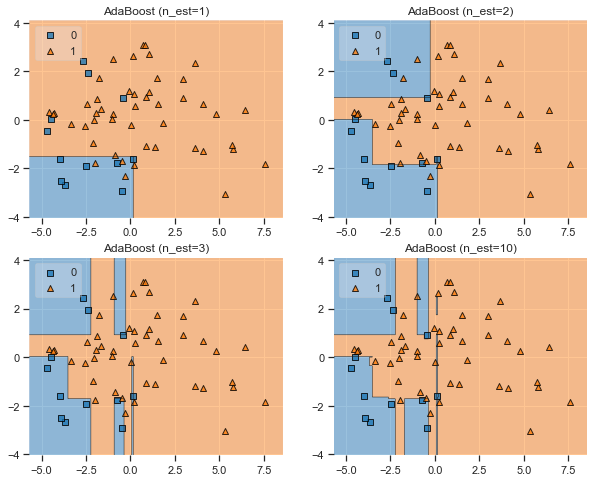

In [583]:
dt_model = DecisionTreeClassifier(criterion='entropy',max_depth=6,random_state=100,min_samples_leaf=5)
dt_model.fit(x_train, y_train)

fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0,1],repeat=2)

for n_est, label, grd in zip(num_est, label, grid):     
    boosting = AdaBoostClassifier(base_estimator=dt_model, n_estimators=n_est)  
    pca = PCA(n_components = 2)
    X_train2 = pca.fit_transform(x_test)

    boosting.fit(X_train2, y_test)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(np.array(X_train2), np.array(y_test), clf=boosting, legend=2)
    plt.title(label)

plt.show()

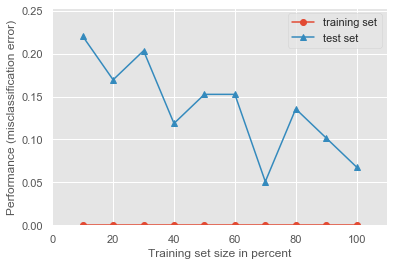

In [585]:
boosting = AdaBoostClassifier(base_estimator=dt_model, n_estimators=10)
        
plt.figure()
plot_learning_curves(x_train, y_train, x_test, y_test, boosting, print_model=False, style='ggplot')
plt.show()

In [380]:
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05)
gbcl = gbcl.fit(x_train,y_train)
y_pred = gbcl.predict(x_test)
gbcl.score(x_test , y_test)

0.9491525423728814

0.8813559322033898


(2.0, 0.0)

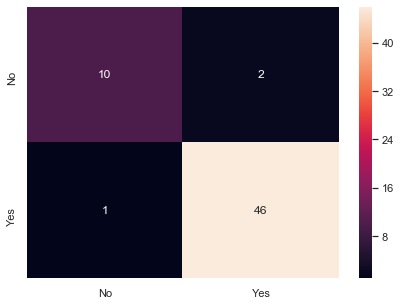

In [546]:
y_predict = gbcl.predict(x_test)

print(bgcl.score(x_test , y_test))

cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
ax=sns.heatmap(df_cm, annot=True ,fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [381]:
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples in Gradient Boosting: {}'.format(count_misclassified))

Misclassified samples in Gradient Boosting: 3


### Observation:

Among the Ensemble techniques the GradientBoosting method performed best with 0.94 accuracy

### Let's include couple of other ensemble classifier and more base classifiers 

In [522]:
from sklearn import svm

# lets create an array of classifiers

MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(n_neighbors=3),
    
    #SVM
    svm.SVC(probability=True, kernel="rbf"),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(max_features =20),
    tree.ExtraTreeClassifier(),
    
    ]

In [523]:
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve

MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)


row_index = 0
for alg in MLA:
    
    
    predicted = alg.fit(x_train, y_train).predict(x_test)
    fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(x_train, y_train), 4)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(x_test, y_test), 4)
    MLA_compare.loc[row_index, 'MLA Precission'] = precision_score(y_test, predicted)
    MLA_compare.loc[row_index, 'MLA Recall'] = recall_score(y_test, predicted)
    MLA_compare.loc[row_index, 'MLA AUC'] = auc(fp, tp)

    row_index+=1
    
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)    
MLA_compare

MLA Name  MLA Train Accuracy  MLA Test Accuracy  \
13         KNeighborsClassifier              0.9706             0.9661   
3    GradientBoostingClassifier              1.0000             0.9492   
5     GaussianProcessClassifier              1.0000             0.9492   
0            AdaBoostClassifier              1.0000             0.9322   
1             BaggingClassifier              0.9926             0.9153   
14                          SVC              0.8897             0.9153   
9                 SGDClassifier              0.8824             0.9153   
17       DecisionTreeClassifier              1.0000             0.8983   
4        RandomForestClassifier              1.0000             0.8814   
2          ExtraTreesClassifier              1.0000             0.8814   
15                        NuSVC              0.8603             0.8814   
18          ExtraTreeClassifier              1.0000             0.8644   
8             RidgeClassifierCV              0.8603             0.8475   
6          LogisticRegressionCV              0.8603             0.8475   
10                   Perceptron              0.8456             0.8475   
16                    LinearSVC              0.8750             0.8475   
7   PassiveAggressiveClassifier              0.8456             0.8136   
11                  BernoulliNB              0.7647             0.7797   
12                   GaussianNB              0.7279             0.7119   

    MLA Precission  MLA Recall   MLA AUC  
13        0.959184    1.000000  0.916667  
3         0.958333    0.978723  0.906028  
5         0.940000    1.000000  0.875000  
0         0.977778    0.936170  0.926418  
1         0.937500    0.957447  0.853723  
14        0.903846    1.000000  0.791667  
9         0.903846    1.000000  0.791667  
17        0.955556    0.914894  0.874113  
4         0.934783    0.914894  0.832447  
2         0.916667    0.936170  0.801418  
15        0.870370    1.000000  0.708333  
18        0.914894    0.914894  0.790780  
8         0.880000    0.936170  0.718085  
6         0.895833    0.914894  0.749113  
10        0.931818    0.872340  0.811170  
16        0.895833    0.914894  0.749113  
7         0.891304    0.872340  0.727837  
11        0.947368    0.765957  0.799645  
12        0.916667    0.702128  0.726064

### Observation:

- As seen earlier the KNN is performing best with Test accuracy : 0.9661(with Precision:0.959184,Recall:1.000000 and AUC:	0.916667)
- As shown above the GradientBoostingClassifier tops second in the listing with Test accuracy : 0.9492;	(with Precision:0.958333; Recall:0.978723; and AUC:	0.906028)
- the AdaBoostClassifier performes best with Test accuracy :0.9322 and Precesion: 0.977778

#### Let's vizualize the above data table:

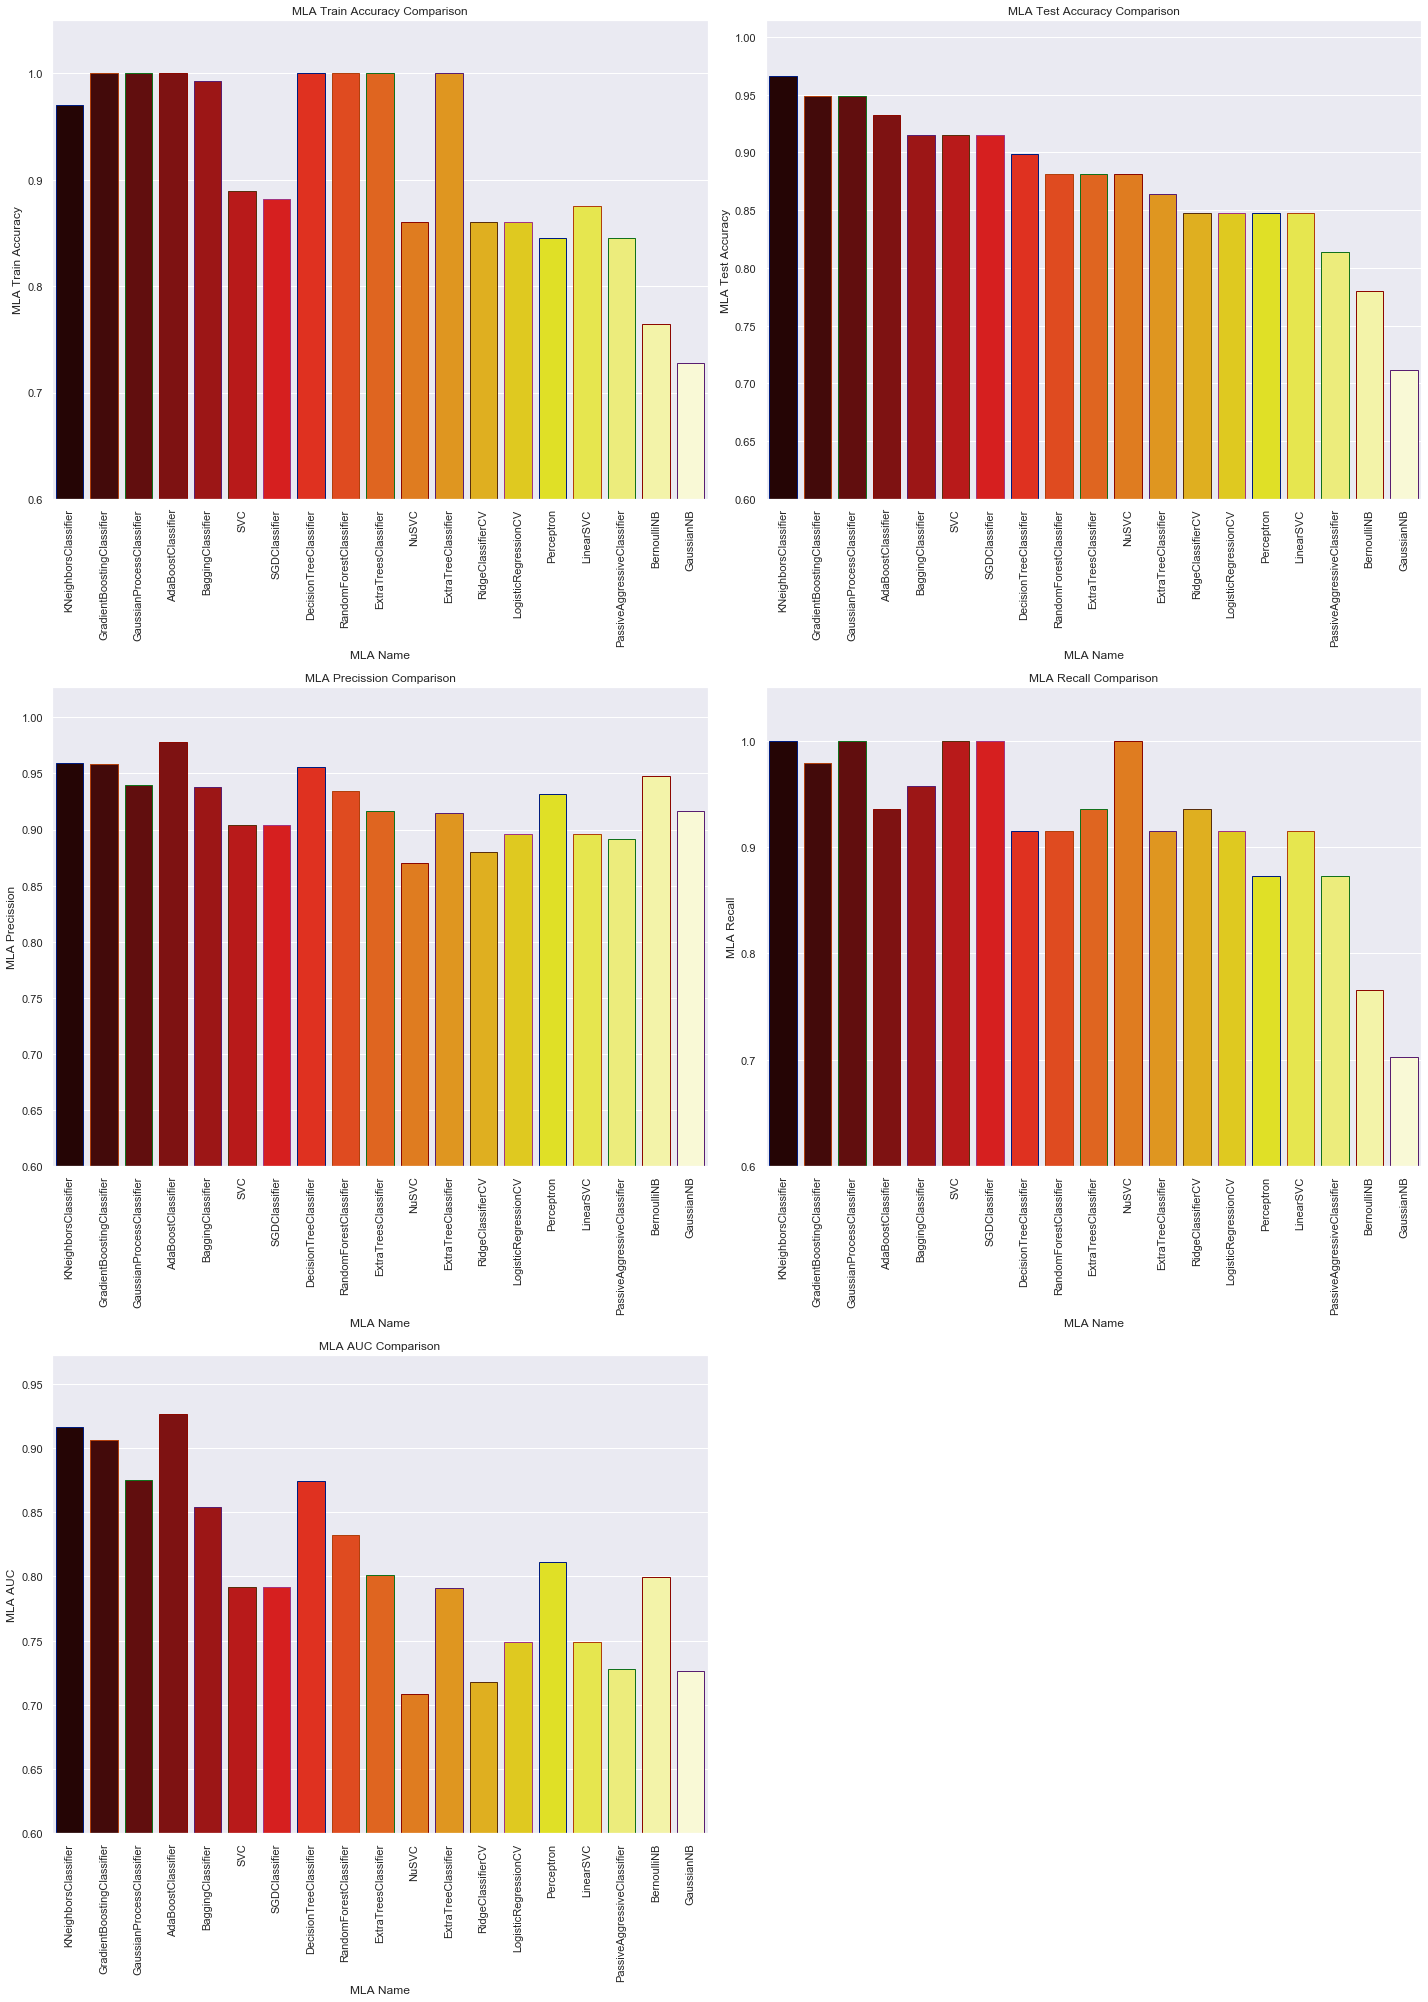

In [524]:
plt.figure(figsize= (20,35))
plt.subplot(4,2,1)
ax = sns.barplot(x="MLA Name", y="MLA Train Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Train Accuracy Comparison')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.6)
plt.tight_layout()

plt.subplot(4,2,2)
ax = sns.barplot(x="MLA Name", y="MLA Test Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Test Accuracy Comparison')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.6)
plt.tight_layout()

plt.subplot(4,2,3)
ax = sns.barplot(x="MLA Name", y="MLA Precission",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Precission Comparison')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.6)
plt.tight_layout()

plt.subplot(4,2,4)
ax = sns.barplot(x="MLA Name", y="MLA Recall",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Recall Comparison')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.6)
plt.tight_layout()

plt.subplot(4,2,5)
ax = sns.barplot(x="MLA Name", y="MLA AUC",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA AUC Comparison')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.6)
plt.tight_layout()



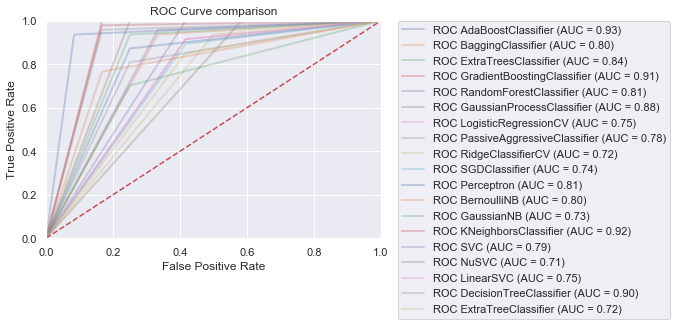

In [525]:
index = 1
for alg in MLA:
    
   
    predicted = alg.fit(x_train, y_train).predict(x_test)
    fp, tp, th = roc_curve(y_test, predicted)
    roc_auc_mla = auc(fp, tp)
    MLA_name = alg.__class__.__name__
    plt.plot(fp, tp, lw=2, alpha=0.3, label='ROC %s (AUC = %0.2f)'  % (MLA_name, roc_auc_mla))
   
    index+=1

plt.title('ROC Curve comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()

-----------------------------------------------------------------------------------------------------------------------

### Observation:

The ROC curve also shows AdaBoostClassifier, GradientBoostingClassifier and KNN as the top algorithms for the PD analysis data set

### Conclution:
    
The stacking ensemble is tried, it consists of Naive bayes, Random Forest, and DT base classifiers whose predictions are combined by Logistic Regression as a meta-classifier. We can see the blending of decision boundaries achieved by the stacking classifier.the choice of the base classifiers largely influence the staking ensemble.

Based on the ensemble classifiers, the highest performing algorithms, k Nearest Neighbors(KNN), AdaBoostClassifier, GradientBoostingClassifier are the best for the analysis of the Parkinson’s Disease data set.